# <font color=navy> <u> Lending Club Case Study by Shailesh Kadre </font>
## <font color=navy> <u> EPGP ML C46 October 2022 Batch </font>  

#### <font color=navy> Problem Statement: </font> <br>
This case study is for a consumer finance company which specializes in offering online loans to customers in urban segment for personal, business and medical procedure domains. The operations are very efficient and fast due to a good interface and company offers low interest rates to their customers.

    
- The main factor to perform this study is to find out and create a knowlege base of the the dependent variableswhich cause default. This study will be a supporting document for the compan  risk mangement and loan portfolio. 


#### <font color=navy> Business Goal: </font> <br>
In this case study, the all customer data base is avaible for a duration of five years. Following are the key objectives to be answered from this case study:

- Clear identification of default customer with the help of study of dependent variables
- Creation of knowledgebase for the future risk assessment and cutomer portfolio. 



## Table of Contents 

<a href='#1'>  1. Data Exploration & Cleaning </a> <br>
<a href='#2'>  2. Univariate Analysis </a> <br>
<a href='#3'>  3. Segmented Univariate Analysis </a> <br>
<a href='#4'>  4. Deep Dive for the additional exploration  </a> <br>
<a href='#5'>  5. Bivariate Analysis </a> <br>
<a href='#6'>  6. Heat Maps </a> <br>
<a href='#8'>  7. Analyst's Recommendations </a> <br>

### 1.Data Exploration & Cleaning

Following steps are addresses in this section
- Data cleaning for determining the columns with Null values and depending on their relative coubts, dropping them
- Removal of unwanted characters such as >, + and month which does not add any value to current analysis
- Remaoval of such columns which does not add any value to the current analysis.

In [33]:
# Import Key Python Libraries necessary for Exploratory Data Analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
sns.set_context('poster',font_scale=0.8)
# to maximize the display a large group of rows and columns
pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 400)
pd.set_option('display.width', 2000)

In [34]:
# import raw data in csv format 
# set low_memory - False to supress warning messages
df_loan_raw_data = pd.read_csv('loan.csv',encoding = "ISO-8859-1", low_memory=False)

In [35]:
# print first 5 rows of the df_loan_raw_data
df_loan_raw_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [36]:
# find the data types of each column in the data base
df_loan_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [26]:
#Determine the size of the raw data
df_loan_raw_data.shape

(39717, 111)

In [38]:
df_loan_raw_data.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [37]:
# Data Cleaning- 1: Column wise sum of null values check
col_null_check = df_loan_raw_data.isnull().sum()
col_null_check

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


Observations- Many colums have all (39717) null values by the study of the jull count sum, we can drop the colums who has more than 20000 total null values

In [41]:
drop_null_columns = list(col_null_check .loc[col_null_check >= 20000].index)
drop_null_columns

['mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',


All these colums will be dropped. Determine the number of such columns

In [45]:
(len(drop_null_columns))

57

In [58]:
df_loan_final = df_loan_raw_data.drop(drop_null_columns,axis=1)
df_loan_final.shape

(39717, 54)

Determine the sum of current null columns

In [59]:
col_null_check = df_loan_final.isnull().sum()
col_null_check

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

Now we have only one column with 12940 null values. This can also be dropped. So dropping. After this step, is null sum is very small.

In [60]:
df_loan_final = df_loan_final.drop('desc', axis=1)

In [54]:
df_loan_final.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

dropping all the rows with null values as their number is small

In [61]:
df_loan_final.dropna(inplace=True)

In [62]:
df_loan_final.shape

(36431, 53)

In [63]:
df_loan_final.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_ac

In [64]:
df_loan_final.describe() 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.643100e+04,3.643100e+04,36431.000000,36431.000000,36431.000000,36431.000000,3.643100e+04,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.0,36431.0,36431.0,36431.0,36431.0,36431.000000,36431.0
mean,6.910141e+05,8.611116e+05,11307.794186,11032.933491,10601.876895,326.187642,6.930694e+04,13.444293,0.146139,0.864840,9.351679,0.053663,13466.188740,22.246137,52.468572,52.216180,12311.226392,11841.691116,9912.631803,2304.442520,1.299912,92.852238,11.677622,2743.075381,0.0,1.0,0.0,0.0,0.0,0.041366,0.0
std,2.026042e+05,2.538291e+05,7433.904309,7166.520054,7072.645601,207.390058,6.354376e+04,6.643417,0.492211,1.063383,4.373724,0.234897,15702.347369,11.376630,379.861072,378.454016,9048.552965,8911.170172,7053.310578,2629.598904,7.065817,682.064837,140.884174,4473.621163,0.0,0.0,0.0,0.0,0.0,0.200100,0.0
min,5.574200e+04,1.144260e+05,500.000000,500.000000,0.000000,16.080000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.010000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.226890e+05,6.755430e+05,5600.000000,5500.000000,5000.000000,168.900000,4.200000e+04,8.360000,0.000000,0.000000,6.000000,0.000000,3832.000000,14.000000,0.000000,0.000000,5672.634184,5413.880000,4800.000000,678.030000,0.000000,0.000000,0.000000,226.310000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.705750e+05,8.569760e+05,10000.000000,10000.000000,9203.371902,283.280000,6.000000e+04,13.540000,0.000000,1.000000,9.000000,0.000000,9031.000000,21.000000,0.000000,0.000000,10101.589360,9632.410000,8123.600000,1379.820000,0.000000,0.000000,0.000000,571.700000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.399035e+05,1.049794e+06,15000.000000,15000.000000,14508.774540,432.220000,8.300000e+04,18.690000,0.000000,1.000000,12.000000,0.000000,17231.500000,29.000000,0.000000,0.000000,16700.865405,16094.780000,14000.000000,2891.865000,0.000000,0.000000,0.000000,3457.620000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077430e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [65]:
df_loan_final.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mt

from the describe function, the statistical values of last columns are zero. let us check them and drop them if required

In [66]:
df_loan_final.tax_liens.value_counts()

0.0    36431
Name: tax_liens, dtype: int64

In [68]:
df_loan_final.pub_rec_bankruptcies.value_counts()

0.0    34931
1.0     1493
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [69]:
df_loan_final.delinq_amnt.value_counts()

0    36431
Name: delinq_amnt, dtype: int64

In [70]:
df_loan_final.chargeoff_within_12_mths.value_counts()

0.0    36431
Name: chargeoff_within_12_mths, dtype: int64

on the same logic, follwing columns can be drpped
collections_12_mths_ex_med	policy_code	acc_now_delinq	chargeoff_within_12_mths	delinq_amnt	pub_rec_bankruptcies	tax_liens 

In [72]:
remove_col_with_zero = ["collections_12_mths_ex_med","policy_code","acc_now_delinq","chargeoff_within_12_mths","delinq_amnt","pub_rec_bankruptcies","tax_liens"]
df_loan_final = df_loan_final.drop(remove_col_with_zero,axis=1)

In [77]:
df_loan_final.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,INDIVIDUAL
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,INDIVIDUAL
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,f,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,INDIVIDUAL
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,f,0.00,0.00,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,INDIVIDUAL
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,car,Car Downpayment,900xx,CA,5.35,0,Jan-07,2,4,0,8221,87.50%,4,f,0.00,0.00,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-15,111.34,Dec-14,INDIVIDUAL
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,other,Building my credit history.,774xx,TX,18.08,0,Sep-04,0,2,0,9279,36.50%,3,f,0.00,0.00,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.52,Nov-12,121.45,Mar-13,INDIVIDUAL
10,1070078,1305201,6500,6500,6500.0,60 months,14.65%,153.45,C,C3,Southwest Rural metro,5 years,OWN,72000.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,High intrest Consolidation,853xx,AZ,16.12,0,Jan-98,2,14,0,4032,20.60%,23,f,0.00,0.00,7678.017673,7678.02,6500.00,1178.02,0.00,0.00,0.00,Jun-13,1655.54,Dec-15,INDIVIDUAL
11,1069908,1305008,12000,12000,12000.0,36 months,12.69%,402.54,B,B5,UCLA,10+ years,OWN,75000.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Consolidation,913xx,CA,10.78,0,Oct-89,0,12,0,23336,67.10%,34,f,0.00,0.00,13947.989160,13947.99,12000.00,1947.99,0.00,0.00,0.00,Sep-13,6315.30,Aug-13,INDIVIDUAL
12,1064687,1298717,9000,9000,9000.0,36 months,13.49%,305.38,C,C1,Va. Dept of Conservation/Recreation,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,freedom,245xx,VA,10.08,0,Apr-04,1,4,0,10452,91.70%,9,f,0.00

In [74]:
df_loan_final.pymnt_plan.value_counts()


n    36431
Name: pymnt_plan, dtype: int64

only one character 'n' so add no value so drop it


In [75]:
df_loan_final = df_loan_final.drop('pymnt_plan', axis=1)

In [76]:
df_loan_final.shape


(36431, 45)

In [82]:
df_loan_final.application_type.value_counts()


INDIVIDUAL    36431
Name: application_type, dtype: int64

Column application type is only individual so dropiing it

In [83]:
df_loan_final = df_loan_final.drop('application_type', axis=1)

In [85]:
df_loan_final.initial_list_status.value_counts()

f    36431
Name: initial_list_status, dtype: int64

Column initial_list_status is only 'f' so dropiing it

In [86]:
df_loan_final = df_loan_final.drop('initial_list_status', axis=1)

In [87]:
df_loan_final.shape

(36431, 43)

final check for null values

In [88]:
df_loan_final.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
url                        0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_in

Checking the column values and data types and perform required corrections

In [89]:
df_loan_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36431 entries, 1 to 39623
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       36431 non-null  int64  
 1   member_id                36431 non-null  int64  
 2   loan_amnt                36431 non-null  int64  
 3   funded_amnt              36431 non-null  int64  
 4   funded_amnt_inv          36431 non-null  float64
 5   term                     36431 non-null  object 
 6   int_rate                 36431 non-null  object 
 7   installment              36431 non-null  float64
 8   grade                    36431 non-null  object 
 9   sub_grade                36431 non-null  object 
 10  emp_title                36431 non-null  object 
 11  emp_length               36431 non-null  object 
 12  home_ownership           36431 non-null  object 
 13  annual_inc               36431 non-null  float64
 14  verification_status   

In [90]:
df_loan_final.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,car,Car Downpayment,900xx,CA,5.35,0,Jan-07,2,4,0,8221,87.50%,4,0.00,0.00,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-15,111.34,Dec-14
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,other,Building my credit history.,774xx,TX,18.08,0,Sep-04,0,2,0,9279,36.50%,3,0.00,0.00,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.52,Nov-12,121.45,Mar-13
10,1070078,1305201,6500,6500,6500.0,60 months,14.65%,153.45,C,C3,Southwest Rural metro,5 years,OWN,72000.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,High intrest Consolidation,853xx,AZ,16.12,0,Jan-98,2,14,0,4032,20.60%,23,0.00,0.00,7678.017673,7678.02,6500.00,1178.02,0.00,0.00,0.00,Jun-13,1655.54,Dec-15
11,1069908,1305008,12000,12000,12000.0,36 months,12.69%,402.54,B,B5,UCLA,10+ years,OWN,75000.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Consolidation,913xx,CA,10.78,0,Oct-89,0,12,0,23336,67.10%,34,0.00,0.00,13947.989160,13947.99,12000.00,1947.99,0.00,0.00,0.00,Sep-13,6315.30,Aug-13
12,1064687,1298717,9000,9000,9000.0,36 months,13.49%,305.38,C,C1,Va. Dept of Conservation/Recreation,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,freedom,245xx,VA,10.08,0,Apr-04,1,4,0,10452,91.70%,9,0.00,0.00,2270.700000,2270.70,1256.14,570.26,0.00,444.30,4.16,Jul-12,305.38,Nov-12


cleaning interest rate column

In [111]:
def clean_value(val):
    return val.replace("%","")

In [112]:
df_loan_final.int_rate = df_loan_final.int_rate.apply(clean_value)

In [117]:
df_loan_final.int_rate =df_loan_final.int_rate.astype("float64")


In [119]:
df_loan_final.emp_length.value_counts()

10+ years    8407
2 years      4176
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

In [120]:
def clean_value(val):
    return (val.replace("+","").replace("<","").replace("years","").replace("year",""))

In [121]:
df_loan_final.emp_length = df_loan_final.emp_length.apply(clean_value)

In [126]:
df_loan_final.emp_length = df_loan_final.emp_length.astype("int32")

Analysis URL column- URL does not have any practical meaning so dropping it

In [128]:
df_loan_final = df_loan_final.drop('url', axis=1)

In [129]:
df_loan_final.shape

(36431, 42)

In [131]:
def clean_value(val):
    return val.replace("%","")

In [132]:
df_loan_final.revol_util = df_loan_final.revol_util.apply(clean_value)

In [133]:
df_loan_final.revol_util =df_loan_final.revol_util.astype("float64")

In [134]:
def clean_value(val):
    return val.replace("months","")

In [135]:
df_loan_final.term = df_loan_final.term.apply(clean_value)

In [138]:
df_loan_final.term =df_loan_final.term.astype("int32")

now see the cleaned data set for intermediate review

In [140]:
df_loan_final.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                         int32
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                   int32
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util          

In [141]:
df_loan_final.shape


(36431, 42)

Updating the date formates of following four coulmns

In [142]:
df_loan_final.issue_d = pd.to_datetime(df_loan_final.issue_d, format='%b-%y')
df_loan_final.earliest_cr_line = pd.to_datetime(df_loan_final.earliest_cr_line, format='%b-%y')


df_loan_final.last_pymnt_d = pd.to_datetime(df_loan_final.last_pymnt_d, format='%b-%y')


df_loan_final.last_credit_pull_d = pd.to_datetime(df_loan_final.last_credit_pull_d, format='%b-%y')

In [146]:
df_loan_final["issue_d_month"]= df_loan_final.issue_d.dt.month
df_loan_final["issue_d_year"] = df_loan_final.issue_d.dt.year

In [148]:
df_loan_final["earliest_cr_line_month"]=df_loan_final.earliest_cr_line.dt.month
df_loan_final["earliest_cr_line_year"] = df_loan_final.earliest_cr_line.dt.year

In [149]:
df_loan_final["last_pymnt_d_month"]=df_loan_final.last_pymnt_d.dt.month
df_loan_final["last_pymnt_d_year"] = df_loan_final.last_pymnt_d.dt.year

In [150]:
df_loan_final["last_credit_pull_d_month"]=df_loan_final.last_credit_pull_d.dt.month
df_loan_final["last_credit_pull_d_year"] = df_loan_final.last_credit_pull_d.dt.year

In [152]:
df_loan_final.shape

(36431, 50)

Now we can drop the above four original columns as thet are already converted in to corresponding year and month

In [153]:
remove_col_with_Yr_mon = ["issue_d","earliest_cr_line","last_pymnt_d","last_credit_pull_d"]
df_loan_final = df_loan_final.drop(remove_col_with_Yr_mon,axis=1)

In [156]:
# As per reject status, first 3 digits of the code are critical
df_loan_final['zip_code'] = df_loan_final.zip_code.apply(lambda x: x[0:3])


In [157]:
df_loan_final['zip_code'].head() 

1    309
3    917
4    972
5    852
6    280
Name: zip_code, dtype: object

Let us see the possibility that whether more number of columns can be dropped or not. The logic behind this column drop that the aim of this study is to create a knoledge base of variables causing default loans vs fully paid loan. So the columns related to current loan. So the colums related to defaulted loan and charged off are invalid and can be dropped off as they are not adding any value to the current business problem. column 'id' is also not showing any additional benifit so can be removed. So after this, following is the consolidated list of columns to be removed

In [158]:
df_loan_final.shape
remove_columns_extra = ['id', 'collection_recovery_fee', 'recoveries','out_prncp','total_rec_late_fee', 'total_rec_int']
df_loan_final = df_loan_final.drop(more_columns_to_drop,axis=1)

(36431, 46)

Funded amount inv also does not add any value so wil be removed

In [165]:
df_loan_final = df_loan_final.drop('funded_amnt_inv',axis=1)

In [166]:
df_loan_final.shape

(36431, 39)

see how the current loan database looks like.

In [170]:
df_loan_final.head()

,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,last_pymnt_amnt,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
1,1314167,2500,2500,60,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,Charged Off,car,bike,309,GA,1.00,0,5,3,0,1687,9.4,4,0.00,1008.71,1008.71,456.46,119.66,12,2011,4,1999,4,2013,9,2013
3,1277178,10000,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Fully Paid,other,personel,917,CA,20.00,0,1,10,0,5598,21.0,37,0.00,12231.89,12231.89,10000.00,357.48,12,2011,2,1996,1,2015,4,2016
4,1311748,3000,3000,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Current,other,Personal,972,OR,17.94,0,0,15,0,27783,53.9,38,524.06,3513.33,3513.33,2475.94,67.79,12,2011,1,1996,5,2016,5,2016
5,1311441,5000,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,Fully Paid,wedding,My wedding loan I promise to pay back,852,AZ,11.20,0,3,9,0,7963,28.3,12,0.00,5632.21,5632.21,5000.00,161.03,12,2011,11,2004,1,2015,1,2016
6,1304742,7000,7000,60,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,Not Verified,Fully Paid,debt_consolidation,Loan,280,NC,23.51,0,1,7,0,17726,85.6,11,0.00,10110.84,10110.84,6985.61,1313.76,12,2011,7,2005,5,2016,5,2016


#### <font color=navy> Data sanity check for data validation  </font> 

The main aim is to check the whether months are between 1 to 12 are not.

In [173]:
df_loan_final.earliest_cr_line_month.value_counts()

10    3765
12    3731
11    3628
9     3272
1     3177
8     3047
7     2819
6     2678
5     2646
2     2617
3     2528
4     2523
Name: earliest_cr_line_month, dtype: int64

It is between 1 to 12 and hence validated

In [175]:
df_loan_final.last_credit_pull_d_month.value_counts()

5     11412
4      4049
3      3009
2      2766
12     2174
11     2018
9      1925
10     1880
7      1869
1      1864
8      1852
6      1613
Name: last_credit_pull_d_month, dtype: int64

It is between 1 to 12 and hence validated

In [176]:
df_loan_final.last_pymnt_d_month.value_counts()

5     3974
3     3430
12    3200
8     3016
10    3015
7     2987
4     2952
2     2893
9     2798
1     2756
6     2735
11    2675
Name: last_pymnt_d_month, dtype: int64

It is between 1 to 12 and hence validated

In [177]:
df_loan_final.last_credit_pull_d_month.value_counts()

5     11412
4      4049
3      3009
2      2766
12     2174
11     2018
9      1925
10     1880
7      1869
1      1864
8      1852
6      1613
Name: last_credit_pull_d_month, dtype: int64

It is between 1 to 12 and hence validated

Now the data looks clean. Now calculation of % reduction in data is calculated as follows

In [178]:
print(100*len(df_loan_final)/len(df_loan_raw_data))

91.7264647380215


Important statistics of cleaned data

In [179]:
df_loan_final.describe()

,member_id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,last_pymnt_amnt,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
count,3.643100e+04,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,3.643100e+04,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.00000,36431.000000,36431.000000,36431.000000
mean,8.611116e+05,11307.794186,11032.933491,42.624688,12.073891,326.187642,5.127035,6.930694e+04,13.444293,0.146139,0.864840,9.351679,0.053663,13466.188740,49.276069,22.246137,52.216180,12311.226392,11841.691116,9912.631803,2743.075381,7.210562,2010.373720,6.897203,1996.910653,6.45368,2012.873295,5.810079,2014.343938
std,2.538291e+05,7433.904309,7166.520054,10.728895,3.734857,207.390058,3.396394,6.354376e+04,6.643417,0.492211,1.063383,4.373724,0.234897,15702.347369,28.192248,11.376630,378.454016,9048.552965,8911.170172,7053.310578,4473.621163,3.357171,0.807235,3.542503,6.941108,3.41514,1.495745,3.008027,1.733908
min,1.144260e+05,500.000000,500.000000,36.000000,5.420000,16.080000,1.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,33.730000,0.000000,0.000000,0.010000,1.000000,2007.000000,1.000000,1969.000000,1.00000,2008.000000,1.000000,2008.000000
25%,6.755430e+05,5600.000000,5500.000000,36.000000,9.320000,168.900000,2.000000,4.200000e+04,8.360000,0.000000,0.000000,6.000000,0.000000,3832.000000,26.100000,14.000000,0.000000,5672.634184,5413.880000,4800.000000,226.310000,4.000000,2010.000000,4.000000,1994.000000,4.00000,2012.000000,4.000000,2013.000000
50%,8.569760e+05,10000.000000,10000.000000,36.000000,11.860000,283.280000,4.000000,6.000000e+04,13.540000,0.000000,1.000000,9.000000,0.000000,9031.000000,49.900000,21.000000,0.000000,10101.589360,9632.410000,8123.600000,571.700000,7.000000,2011.000000,7.000000,1998.000000,6.00000,2013.000000,5.000000,2015.000000
75%,1.049794e+06,15000.000000,15000.000000,60.000000,14.650000,432.220000,9.000000,8.300000e+04,18.690000,0.000000,1.000000,12.000000,0.000000,17231.500000,72.700000,29.000000,0.000000,16700.865405,16094.780000,14000.000000,3457.620000,10.000000,2011.000000,10.000000,2001.000000,9.00000,2014.000000,8.000000,2016.000000
max,1.314167e+06,35000.000000,35000.000000,60.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,6307.370000,58563.679930,58563.680000,35000.020000,36115.200000,12.000000,2011.000000,12.000000,2068.000000,12.00000,2016.000000,12.000000,2016.000000


## <font color=navy> <u> Data Cleaning- Imporant findings </font>   

- Colums critical to present study are only retained with the addition of some new columns.
- overall 91.7% of oroginal data is retained for analysis.   
- There is a signficant reduction in number of culumns from 111 to 39.
    As a next step, now we can proceed further for the analysis of this data

## 2. Univariate Analysis  <a id='2'></a>

Based on the value of data, it was decided to devide the univariate varibles for plotting to log and non log scale. Basic idea first is to have a feel of the plots for both cases then go for detailed analysis

log scale is used for plotting following variables 

In [196]:
log_var_plot = ['loan_amnt','int_rate','installment','annual_inc','dti','revol_bal','revol_util','out_prncp_inv','total_rec_prncp','last_pymnt_amnt'] 

In [197]:
df_loan_final[log_var_plot].describe()

,loan_amnt,int_rate,installment,annual_inc,dti,revol_bal,revol_util,out_prncp_inv,total_rec_prncp,last_pymnt_amnt
count,36431.000000,36431.000000,36431.000000,3.643100e+04,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000
mean,11307.794186,12.073891,326.187642,6.930694e+04,13.444293,13466.188740,49.276069,52.216180,9912.631803,2743.075381
std,7433.904309,3.734857,207.390058,6.354376e+04,6.643417,15702.347369,28.192248,378.454016,7053.310578,4473.621163
min,500.000000,5.420000,16.080000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,5600.000000,9.320000,168.900000,4.200000e+04,8.360000,3832.000000,26.100000,0.000000,4800.000000,226.310000
50%,10000.000000,11.860000,283.280000,6.000000e+04,13.540000,9031.000000,49.900000,0.000000,8123.600000,571.700000
75%,15000.000000,14.650000,432.220000,8.300000e+04,18.690000,17231.500000,72.700000,0.000000,14000.000000,3457.620000
max,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000,149588.000000,99.900000,6307.370000,35000.020000,36115.200000


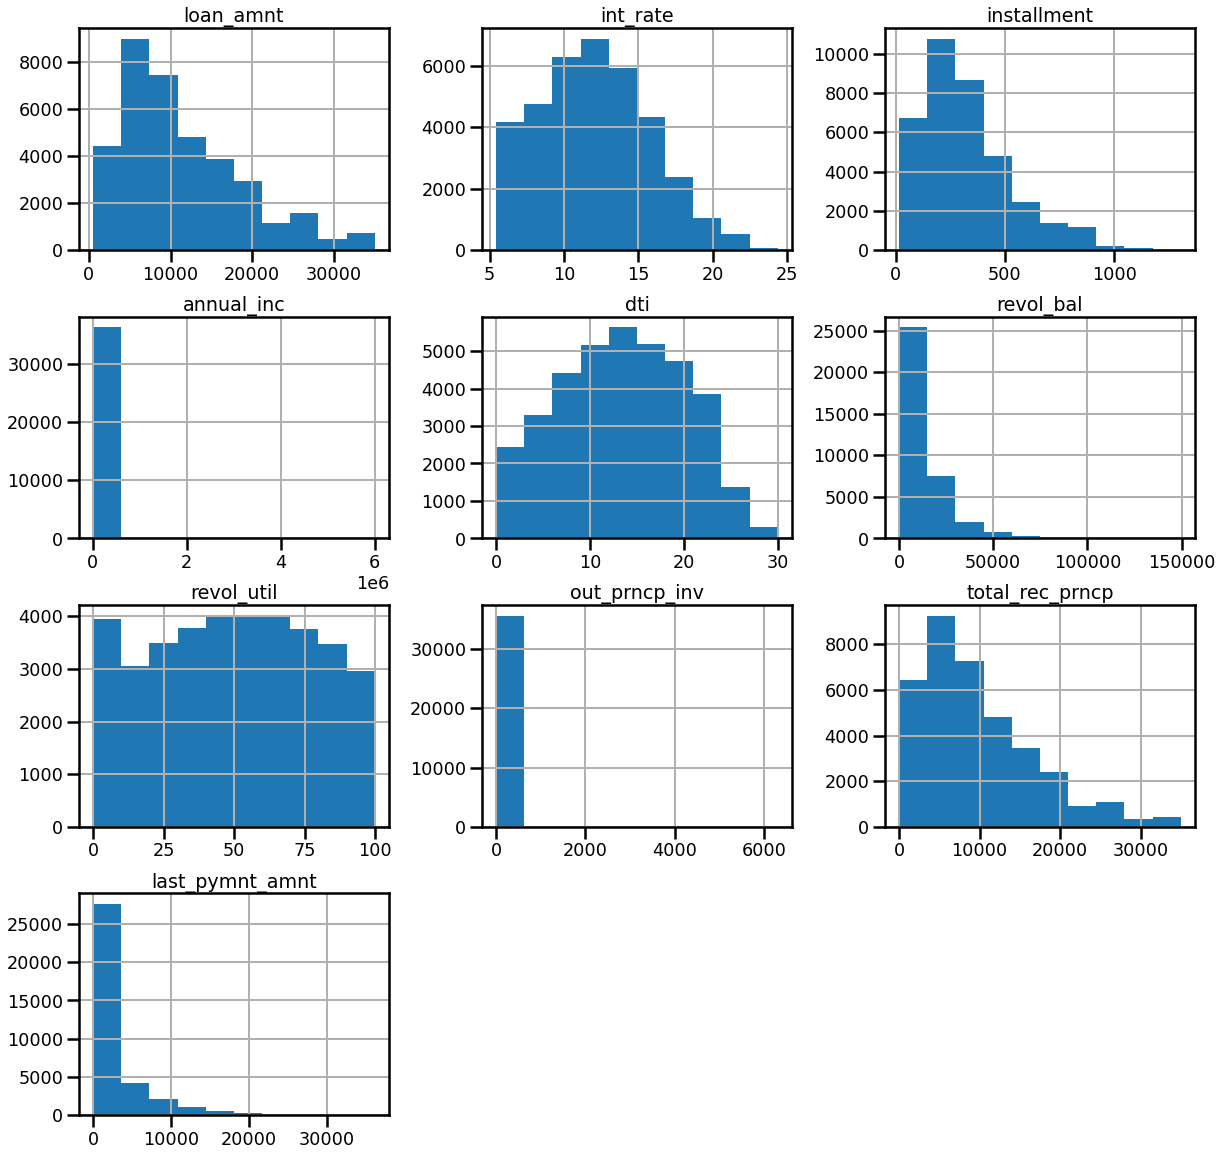

In [226]:
sns.set_context('poster',font_scale=0.8)
 
df_loan_final[log_var_plot].hist(figsize=(20,20))

plt.xscale('log')
plt.yscale('log')
plt.show()

In [240]:
nonlog_vars_plot = ['emp_length', 'delinq_2yrs','inq_last_6mths','open_acc','total_acc'
                     ,'issue_d_month','issue_d_year','earliest_cr_line_month'
                     ,'last_pymnt_d_month','last_pymnt_d_year'
                     , 'last_credit_pull_d_month','last_credit_pull_d_year']

In [241]:
df_loan_final[nonlog_vars_plot].describe()

,emp_length,delinq_2yrs,inq_last_6mths,open_acc,total_acc,issue_d_month,issue_d_year,earliest_cr_line_month,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
count,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.00000,36431.000000,36431.000000,36431.000000
mean,5.127035,0.146139,0.864840,9.351679,22.246137,7.210562,2010.373720,6.897203,6.45368,2012.873295,5.810079,2014.343938
std,3.396394,0.492211,1.063383,4.373724,11.376630,3.357171,0.807235,3.542503,3.41514,1.495745,3.008027,1.733908
min,1.000000,0.000000,0.000000,2.000000,2.000000,1.000000,2007.000000,1.000000,1.00000,2008.000000,1.000000,2008.000000
25%,2.000000,0.000000,0.000000,6.000000,14.000000,4.000000,2010.000000,4.000000,4.00000,2012.000000,4.000000,2013.000000
50%,4.000000,0.000000,1.000000,9.000000,21.000000,7.000000,2011.000000,7.000000,6.00000,2013.000000,5.000000,2015.000000
75%,9.000000,0.000000,1.000000,12.000000,29.000000,10.000000,2011.000000,10.000000,9.00000,2014.000000,8.000000,2016.000000
max,10.000000,11.000000,8.000000,44.000000,90.000000,12.000000,2011.000000,12.000000,12.00000,2016.000000,12.000000,2016.000000


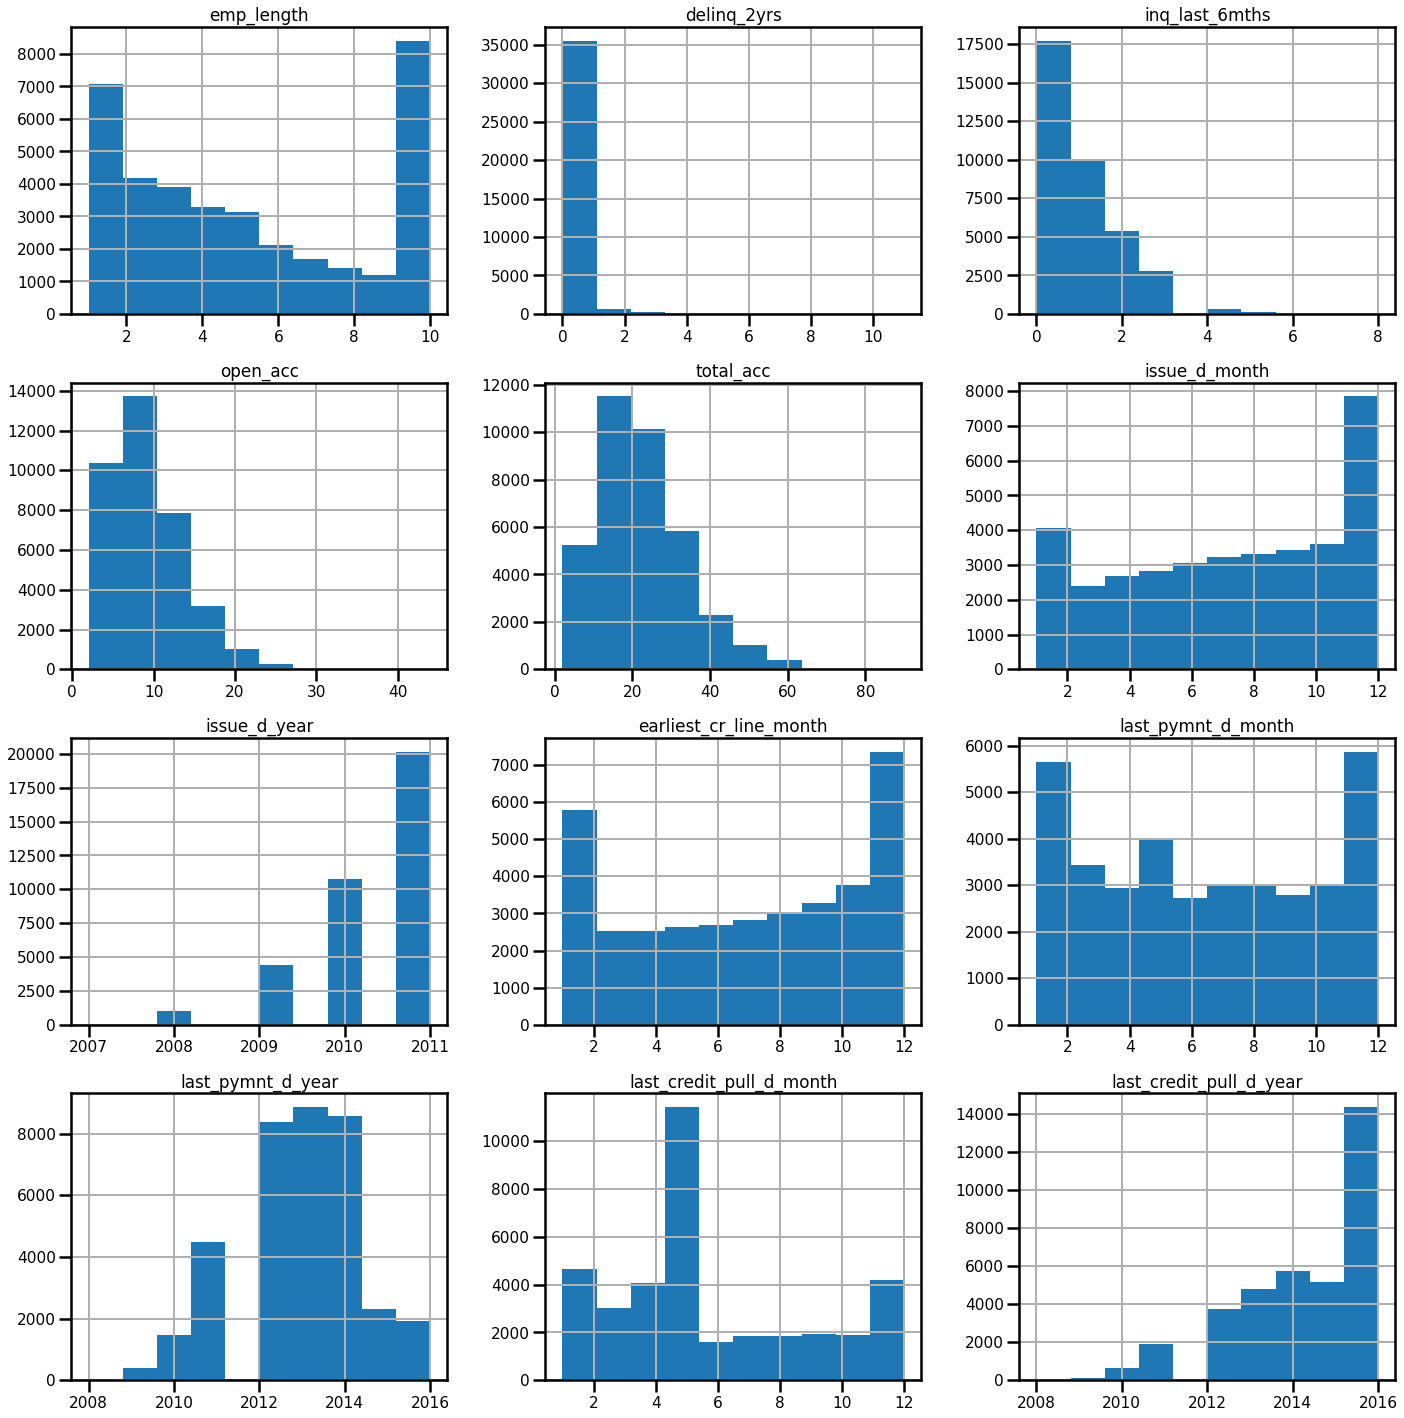

In [242]:
sns.set_context('poster',font_scale=0.7)
 
df_loan_final[nonlog_vars_plot].hist(figsize=(20,20))

plt.tight_layout()
plt.show()

From the above plots following are the ket take away
- We observe that there is no well defined distribution of features.
- The overall judgement of the patterns can be noted from the above plots


Next task is to detect oulier detection using box plot. Since the number of variables to study are more, a function is written for this as follows

In [229]:
def Boxplot_Analysis(df, last):
    sns.set_context('poster',font_scale=0.6)
    nrows = int(len(last)/2)
    
    for ix, value in enumerate(last, start=0):
        plt.subplot(nrows, 2, ix)
        df[[value]].boxplot()
       

    plt.tight_layout()
    plt.show() 

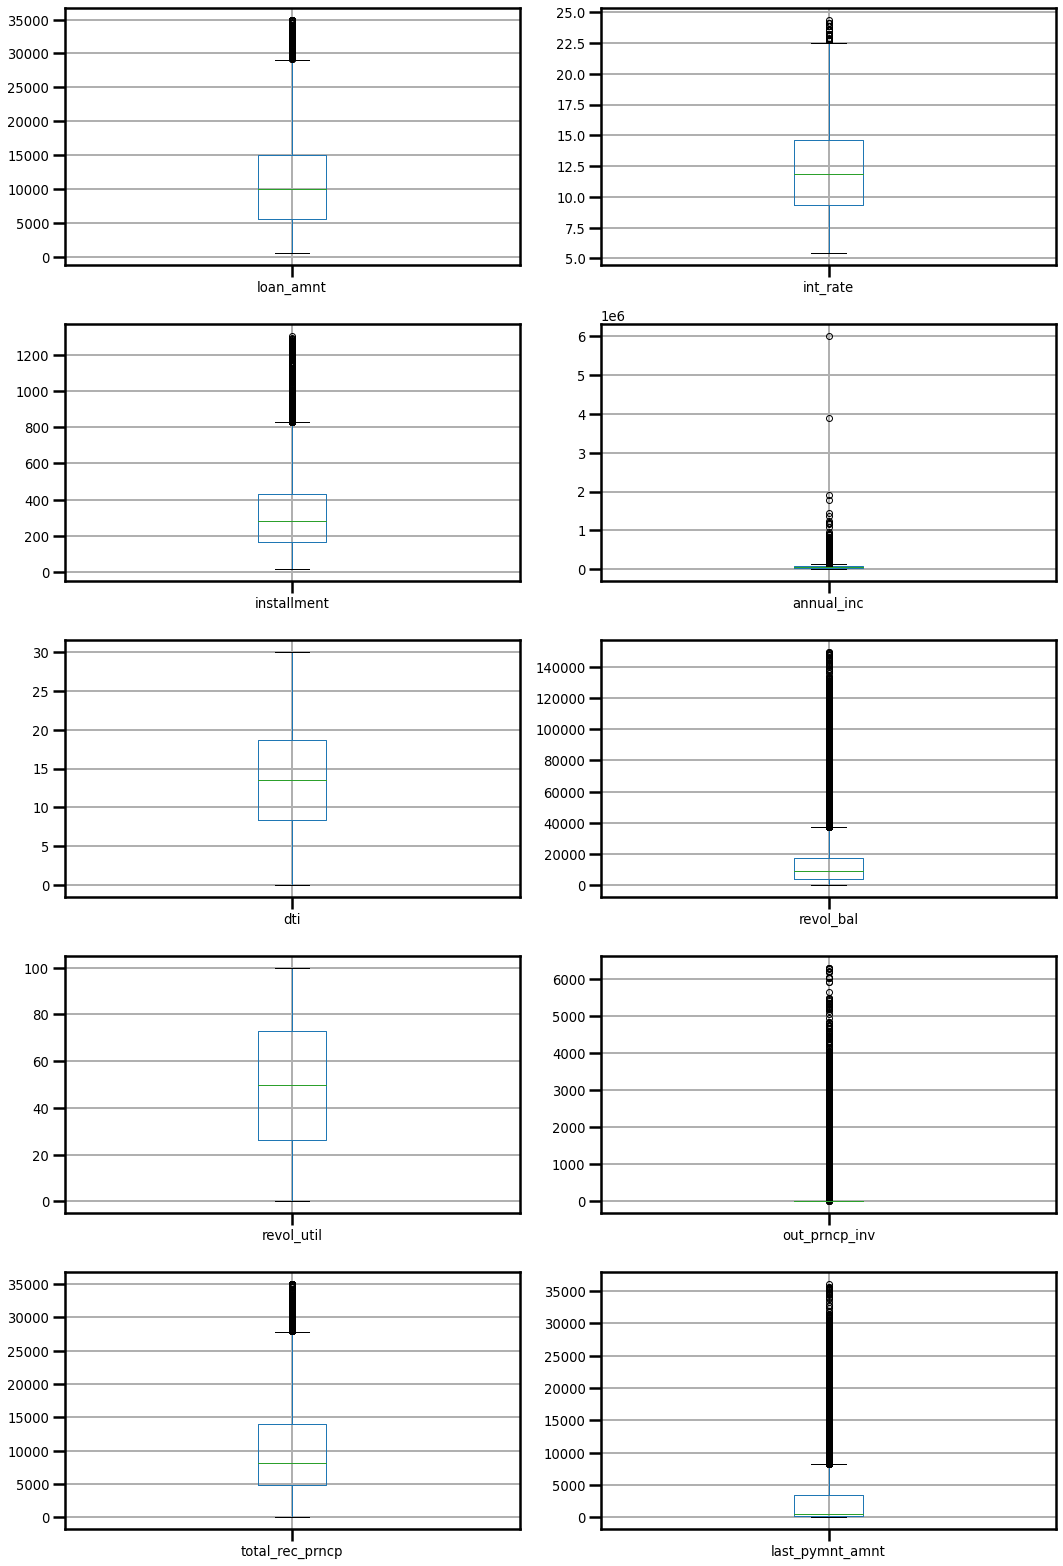

In [238]:
plt.figure(figsize=(15,22))
Boxplot_Analysis(df_loan_final ,log_var_plot)

Following observations are made from above plots 
- There is a huge number of outliers in last payment amount and remaining outstanding principle portion column

- Most installments are about  USD 300 with 12% interest rate while the the 50 pecentile of loan is of 10000 USD

- Most DTI ratio is 14 

- Most revolving credit balance is 10000 USD

- Most Revolving line utilization rate is aroud 50

- The Most priniple received is 8000 USD. 

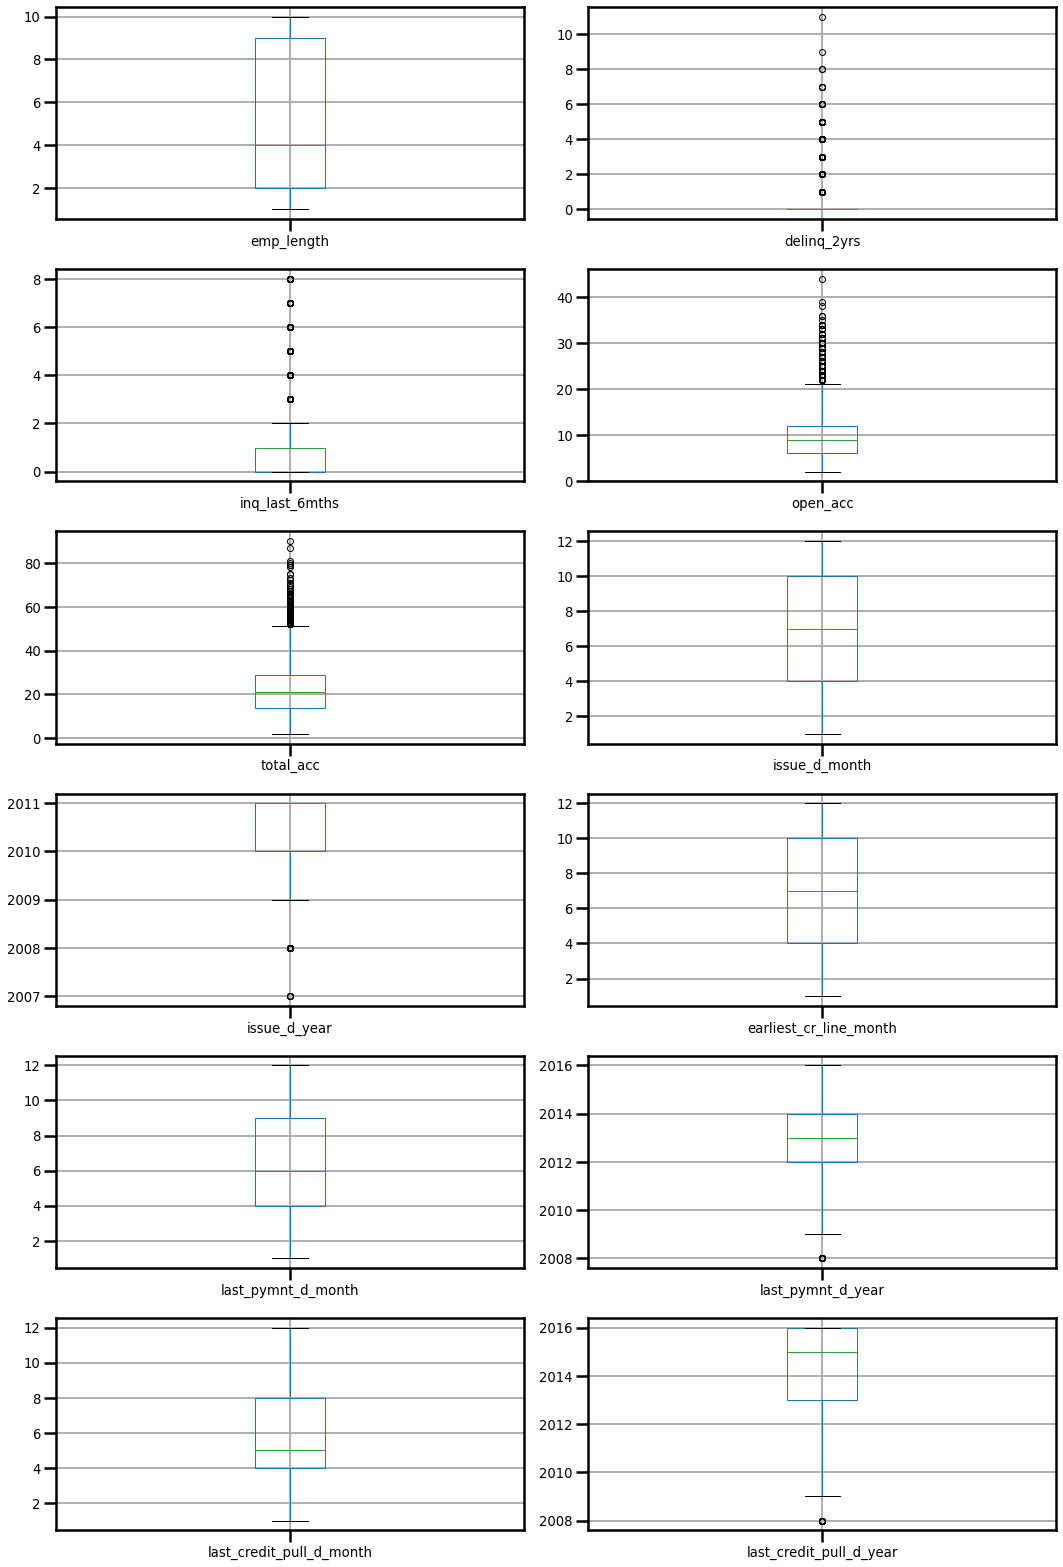

In [248]:
plt.figure(figsize=(15,22))
Boxplot_Analysis(df_loan_final ,nonlog_vars_plot)

Following observations are made from above plots
- Most of the employment length is about 5 years

- 50th pecentile of total number of credit lines held by customer credit is about 20 

- Motly the loan was funded in July month .

-  Mostly in july month, Borrower's credit line was opened

- MIn year 2013, mostly last month payment was received

- Loan enquiries and outliers have large range. 

## 3.Segmented Univariate Analysis  <a id='3'></a>

- Loan cases for fully paid and charged loan
- Determining the effect of loan default factors on the individual variables. 

In [253]:
# TMaking a copy of clenaed datset for further reference
df_loan_clean = df_loan_final.copy()

In [254]:
print(df_loan_final.shape)
print(df_loan_clean.shape)

(36431, 39)
(36431, 39)


In [255]:
df_loan_clean.info() # final datatype check for further analysis

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36431 entries, 1 to 39623
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   member_id                 36431 non-null  int64  
 1   loan_amnt                 36431 non-null  int64  
 2   funded_amnt               36431 non-null  int64  
 3   term                      36431 non-null  int32  
 4   int_rate                  36431 non-null  float64
 5   installment               36431 non-null  float64
 6   grade                     36431 non-null  object 
 7   sub_grade                 36431 non-null  object 
 8   emp_title                 36431 non-null  object 
 9   emp_length                36431 non-null  int32  
 10  home_ownership            36431 non-null  object 
 11  annual_inc                36431 non-null  float64
 12  verification_status       36431 non-null  object 
 13  loan_status               36431 non-null  object 
 14  purpos

All the variable data types seems to be fine

This section plots the hitogram of fields related to this case study

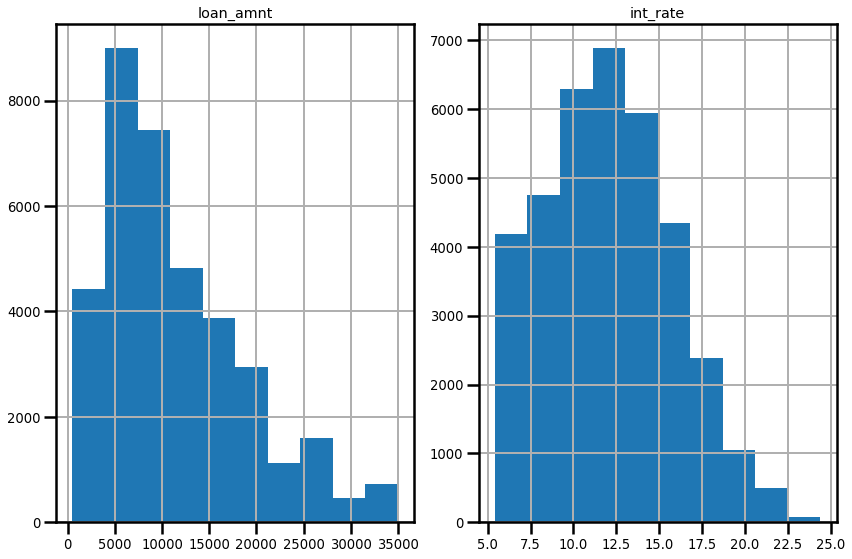

In [257]:
df_loan_clean[['loan_amnt', 'int_rate']].hist(figsize=(12,8))
plt.tight_layout()
plt.show()

There is a huge amount of people between 5000 to 10000 USD with interest rate of 10 to 12%



In [259]:
df_loan_clean.annual_inc.value_counts()

60000.00     1367
50000.00      958
40000.00      800
45000.00      764
65000.00      758
             ... 
39270.00        1
63052.00        1
20496.00        1
91745.00        1
100671.39       1
Name: annual_inc, Length: 4923, dtype: int64

Maximu annual income group is of 60000 USD

In [262]:
# Wiping of loans in the current category
df_loan_clean = df_loan_clean[df_loan_clean['loan_status'].isin(['Fully Paid','Charged Off'])]

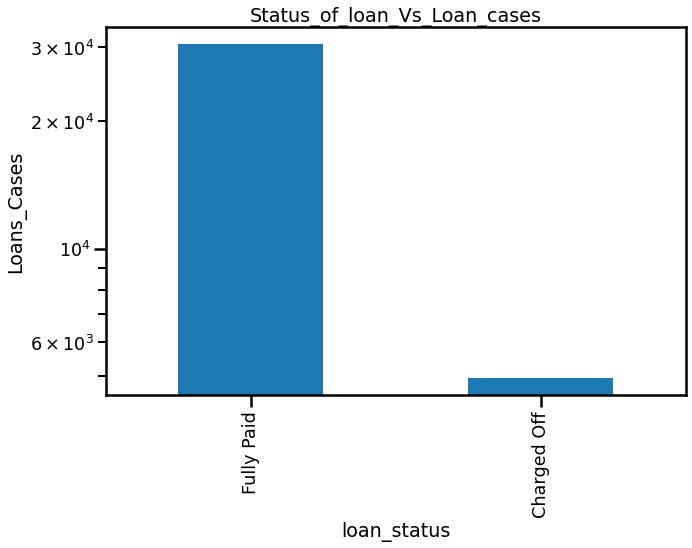

In [265]:
sns.set_context('poster',font_scale=0.8)
ax = df_loan_clean.groupby('loan_status').loan_amnt.count().sort_values(ascending=False).plot.bar(figsize=(10,8))
plt.yscale('log')
ax.set_title('Status_of_loan_Vs_Loan_cases')
ax.set_ylabel('Loans_Cases')
plt.tight_layout()
plt.show()

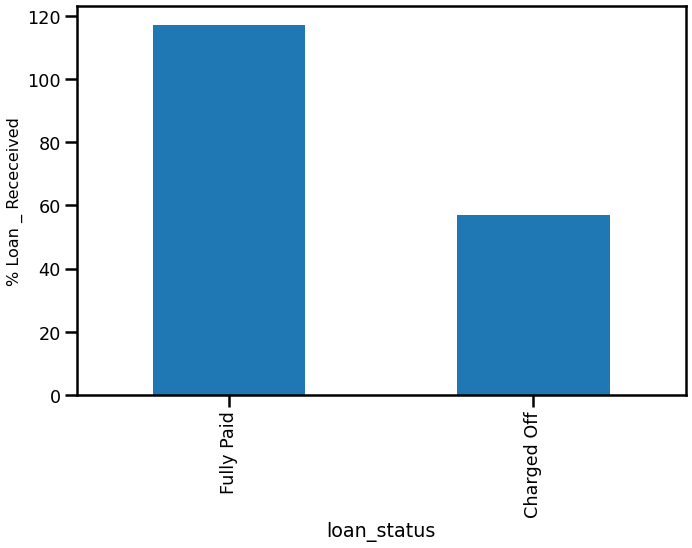

In [267]:
plt.figure(figsize=(10,8))

value_format = "{:.1%}"  # displaying values as percentage with one fractional digit


ax = (df_loan_clean.groupby('loan_status').total_pymnt.sum() * 100 / df_loan_clean.groupby('loan_status').loan_amnt.sum()).sort_values(ascending=False).plot.bar()

ax.set_ylabel('% Loan _ Receceived', fontsize=16)

plt.tight_layout()
plt.show()


- The loan status shows that the 60% of the loans amount is charged_off and comapny is making 15% profit on fully paid

In [274]:
# The ratio total_recoveries/total_loan_amt as on this date
total_recoveries = df_loan_clean.total_pymnt.sum()
loan_amnt_total = df_loan_clean.loan_amnt.sum()
ratio_of_recovery = round(total_recoveries/loan_amnt_total,2)
print(ratio_of_recovery) 

1.08


The ratio of recovery is 1.08 which is good according to current banking business norms bur still there is a scope for improvements

In [276]:
df_loan_clean['loan_status_binary'] = df_loan_clean['loan_status'].astype('category')
df_loan_clean['loan_status_binary'] = df_loan_clean['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

In [277]:
# Converting the type to intiger
df_loan_clean['loan_status_binary'] = pd.to_numeric(df_loan_clean['loan_status_binary'] )
df_loan_clean['loan_status_binary'].value_counts() 

0    30423
1     4942
Name: loan_status_binary, dtype: int64

In [278]:
df_loan_clean['loan_status'].value_counts()

Fully Paid     30423
Charged Off     4942
Name: loan_status, dtype: int64

In [279]:
is_numeric_dtype(df_loan_clean['loan_status_binary'])

True

In [282]:
# We will need to write a function to plot the bar plot for repeated acovities
def CatVsdefaultrateplot(category):
    plt.figure(figsize=(12,8))
    ax = df_loan_clean.groupby(category)['loan_status_binary'].mean().sort_values(ascending=False).plot.bar()
    ax.set_title('Average Default Rates by'+' ' +category)
    ax.set_ylabel('Avgerage  Default Rate')

    plt.tight_layout()
    plt.show()

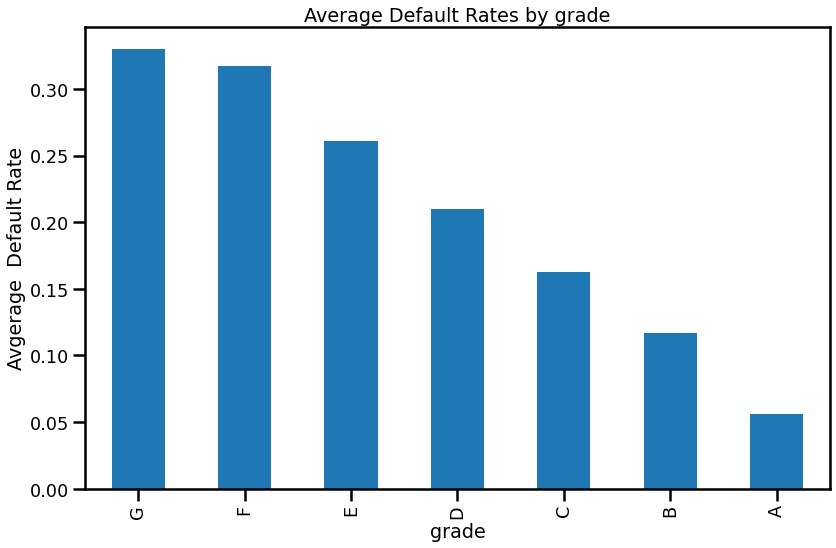

In [283]:
# Plot the average default rates across Loan Grades.
CatVsdefaultrateplot('grade')

- Grades G and F contribute close to 30% of average default grades wich are maximum. More attention from business is required to address this issue
- Grades A and B are minimum defaulter and  contribute close between 5% to 10% of average default grades

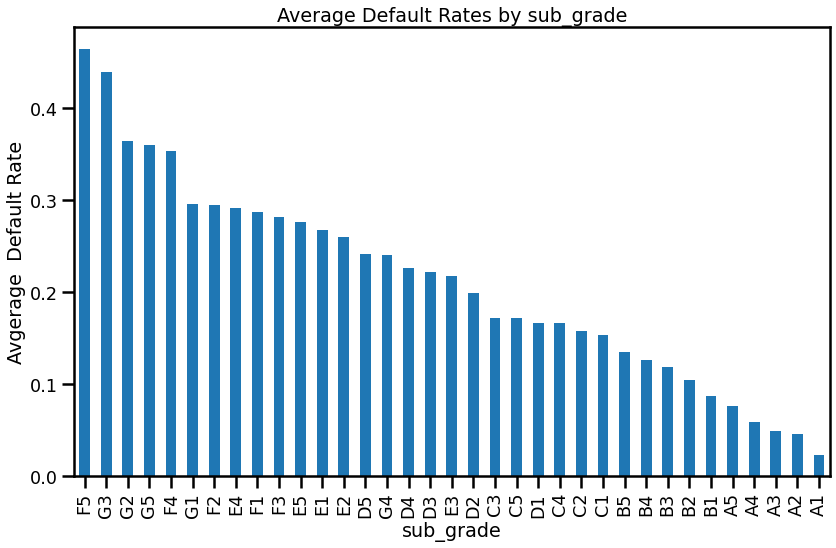

In [284]:
#  Loan Sub Grades are plotted Plotted vs average default rates 
CatVsdefaultrateplot('sub_grade')

- Grades G3 and F5 contribute close to 45% of average default grades wich are maximum. More attention from business is required to address this issue
- Grades A1, A2, A3 are minimum defaulter and contribute close between 5% to 10% of average default grades
- The trend is decreasing from G3 to A1

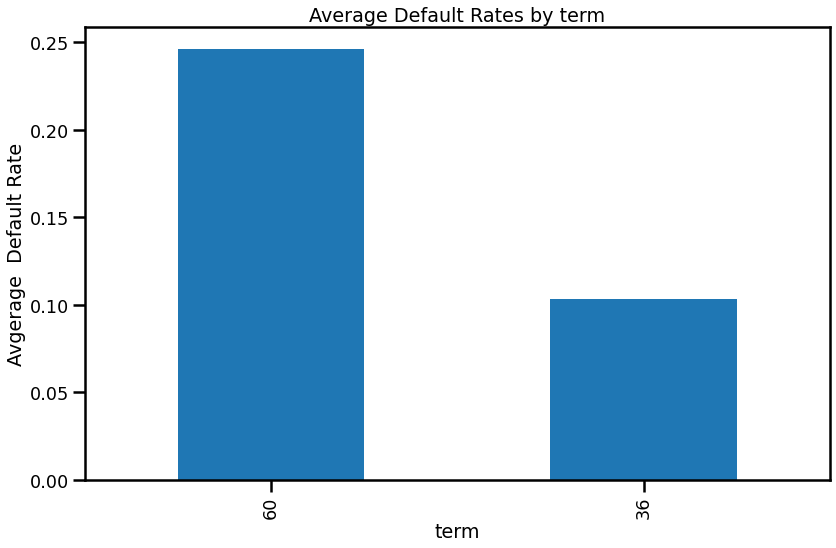

In [287]:
# Plot the average default rates across Loan Term
CatVsdefaultrateplot('term')

- 36 months loan term ( short term) borrowers have minimum average default rate close to 10%
- 60 month loan term( long term) borrowers havehave major issue and average default rate close to 250%

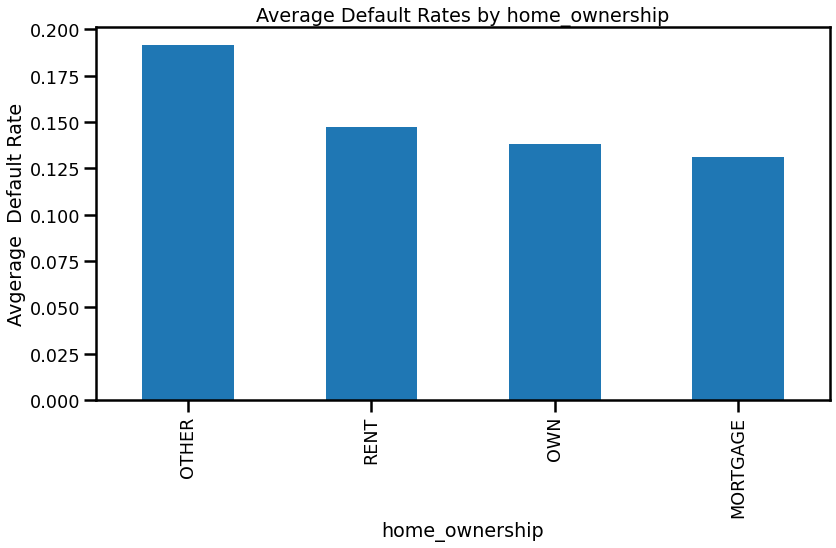

In [288]:
#  average default rates Vs  home ownership type plot
CatVsdefaultrateplot('home_ownership')

- Others are classified as most defaulter
- While those who have take loan for own house and house Mortgage are least defaulter

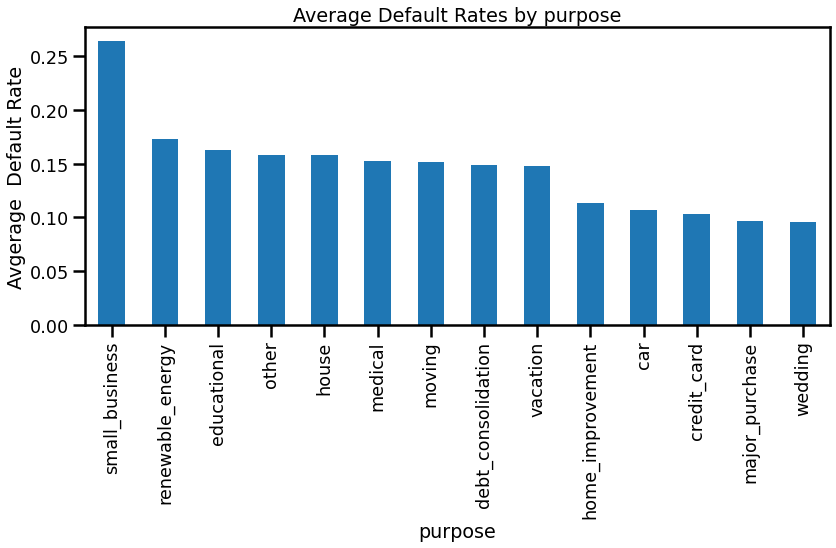

In [289]:
# average default rates Vs purpose of the loan
CatVsdefaultrateplot('purpose')

- Small business  boroweres are most defaulter which is close to 25%. This should be paid due attention by the business
- All othrs are in the range of 15 to 10 %. Loans taken for weddings and major purchases seems to have least defaulters

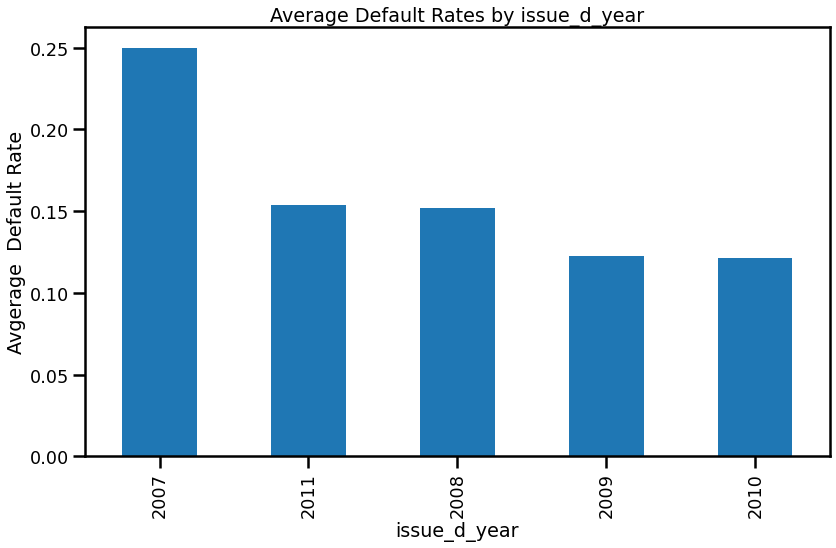

In [291]:
# default rate vs loan issue year
CatVsdefaultrateplot('issue_d_year')

- In the year 2007 there were maximum loan default cases. The obvious reason for this can be global recession but this factor needs further investigation

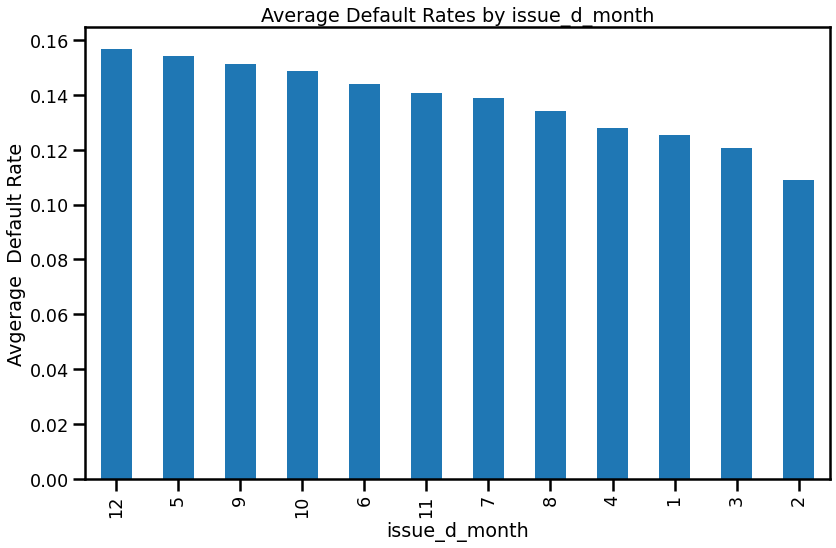

In [293]:
# default rate vs loan issue year plot
CatVsdefaultrateplot('issue_d_month')

- Most defaulted Loans are those issued in December ( 15%)
- Loans issued in Feb ad March are defaulted lease ( 0 to 12%)


C:\Users\Shailesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


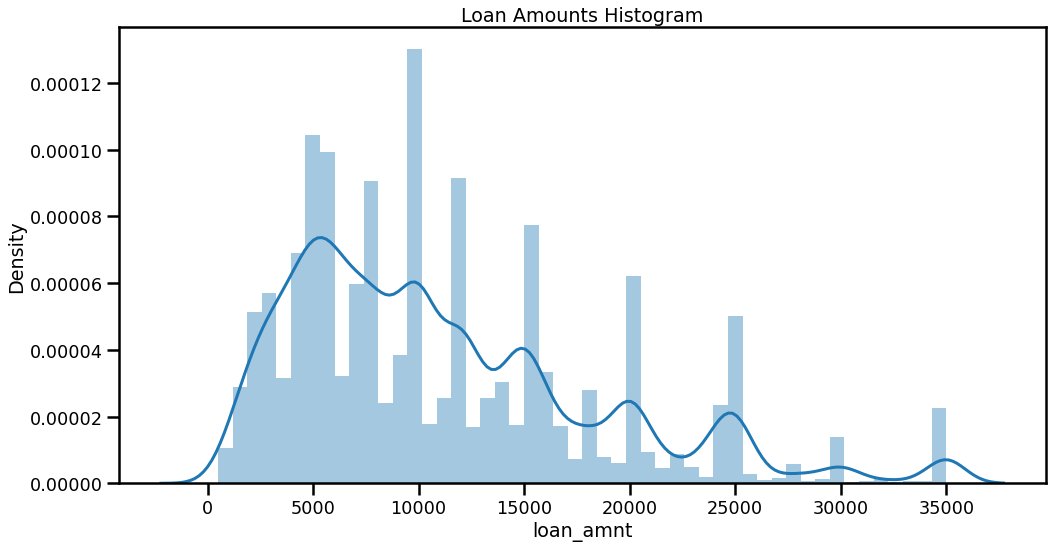

In [295]:
 # the loan Amount histogram plot
plt.figure(figsize=(15,8))
ax = sns.distplot(df_loan_clean['loan_amnt'])

ax.set_title('Loan Amounts Histogram')
 

plt.tight_layout()
plt.show()

In [296]:
def loan_amt_processor(amount):
    if amount < 5000:
        return 'Low_Loan_Amt'
    elif amount >=5000 and amount < 15000:
        return 'Medium_Loan_Amt'
    else :
        return 'High_Loan_Amt'

In [298]:
df_loan_clean['loan_amt_processor'] = df_loan_clean['loan_amnt'].apply(lambda x: loan_amt_processor(x))

In [299]:
round(df_loan_clean['loan_amt_processor'].value_counts()/ len(df_loan_clean['loan_amt_processor'])*100,2)

Medium_Loan_Amt    53.92
High_Loan_Amt      27.39
Low_Loan_Amt       18.69
Name: loan_amt_processor, dtype: float64

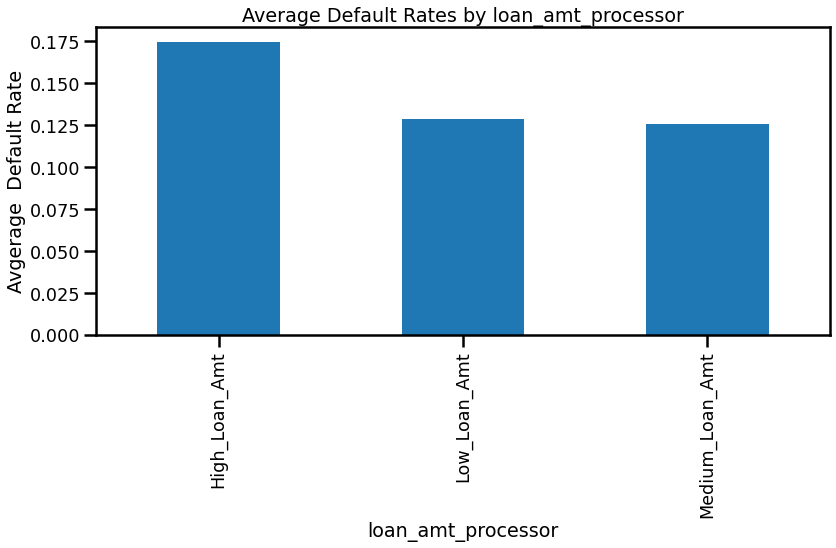

In [300]:
# default rate vs loan amout buckets ( High ,mediu and low) plot
CatVsdefaultrateplot('loan_amt_processor')

- 17% of the defaulters are from high loan amount bucket. This should have clear relationship with their annual income. let us investigate this.

In [303]:
# Let's bin the annual income  by looking at the dishplot above. 
def annual_income_buckets(amount):
    if amount < 100000:
        return 'Moderate_Income'
    elif amount > 100000 and amount <=1000000:
        return 'High_Income'
    else :
        return 'Ultra_Rich'

In [305]:
df_loan_clean['annual_income_buckets'] = df_loan_clean['annual_inc'].apply(lambda x: annual_income_buckets(x))

In [306]:
round(df_loan_clean['annual_income_buckets'].value_counts()/ len(df_loan_clean['annual_income_buckets'])*100,2)

Moderate_Income    84.55
High_Income        14.16
Ultra_Rich          1.29
Name: annual_income_buckets, dtype: float64

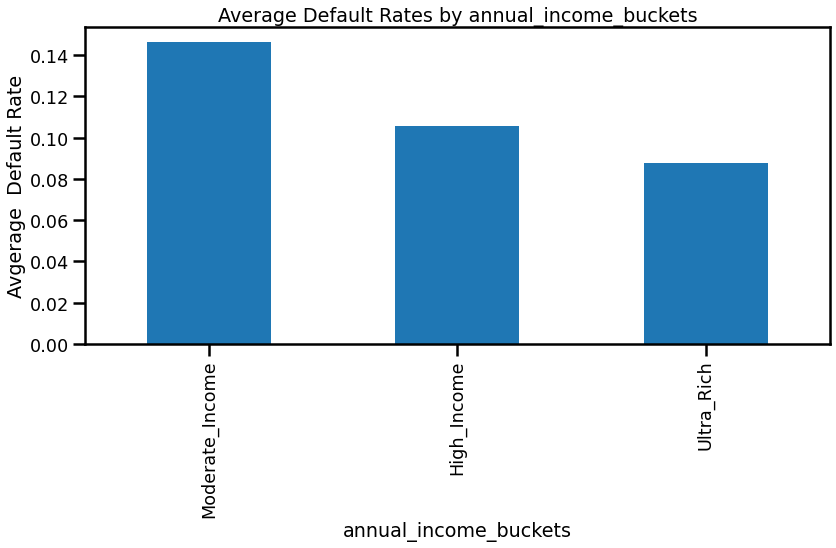

In [307]:
# default rate vs annual income buckets plot
CatVsdefaultrateplot('annual_income_buckets')

- Moderate income ( income < 0.1 M USD) are the most defaulter (14%)
- next higher defaulter category is High Income group ( Income between 100000USD and1 000000USD)

In [310]:
# now concentratig on dti, the debt to income ratio

def dti_buckets(dtiStr): # Function to bucket dti
    if dtiStr <= 10:
        return 'low dti'
    elif dtiStr > 10 and dtiStr <=20:
        return 'medium dti'
    else:
        return 'high dti'
    

df_loan_clean['dti'] = df_loan_clean['dti'].apply(lambda x: dti_buckets(x)) 

In [311]:
print(round(df_loan_clean['dti'].value_counts()/ len(df_loan_clean['dti'])*100,2))

medium dti    48.27
low dti       32.68
high dti      19.06
Name: dti, dtype: float64


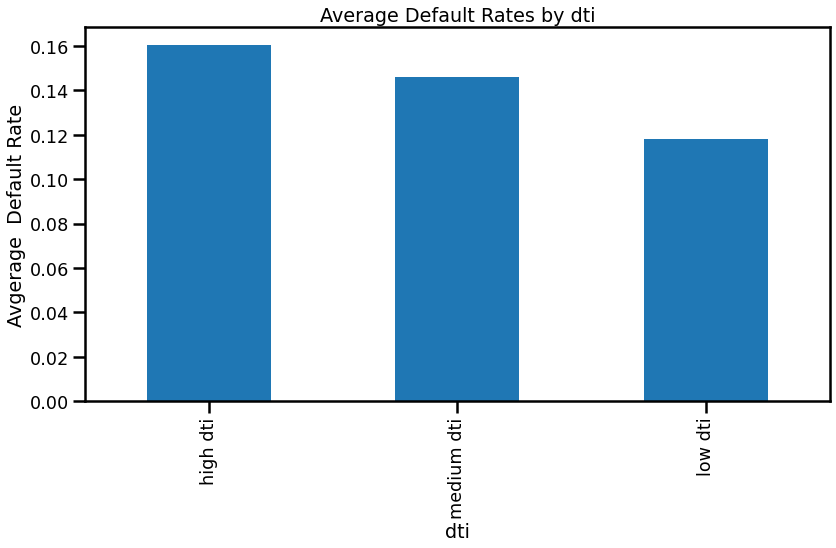

In [312]:
CatVsdefaultrateplot('dti')

- It is evident that borrowers with high dti (> 20)  are most defaulter
- Borrowers with low dti (< 10) are less defaulters
- The defaulter rage varies from 12% to 16%

In [314]:
def int_rate_buckets(amount):
    if amount <= 10:
        return 'Low_Rate'
    elif amount > 10 and amount <=20:
        return 'Med_Rate'
    else :
        return 'High_Rate'
df_loan_clean['int_rate_buckets'] = df_loan_clean['int_rate'].apply(lambda x: int_rate_buckets(x))
print(round(df_loan_clean['int_rate_buckets'].value_counts()/ len(df_loan_clean['int_rate_buckets'])*100,2))

Med_Rate     66.55
Low_Rate     31.39
High_Rate     2.06
Name: int_rate_buckets, dtype: float64


- This data shows that "high risk reward" is the business strategy landing club company as 66% or the current client base in of dedium rate.
- Low interest rate customer are only 31% which are in safe category


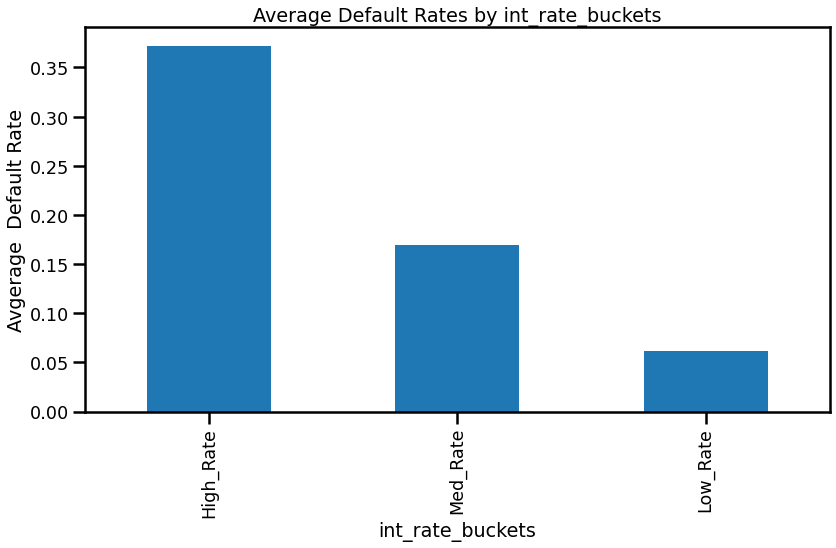

In [316]:
#  default rate vs annual interest rates.
CatVsdefaultrateplot('int_rate_buckets')

- clients with interest rate < 10% are safest and have only 5% default rate
- As expected, clients with interest rate > 20% are the bigest risk to company and they contribute to 35% in the overall defaut list
- Business should focus on moderate interest rate bucket which in between these two categories so that they can be converted to low risk business


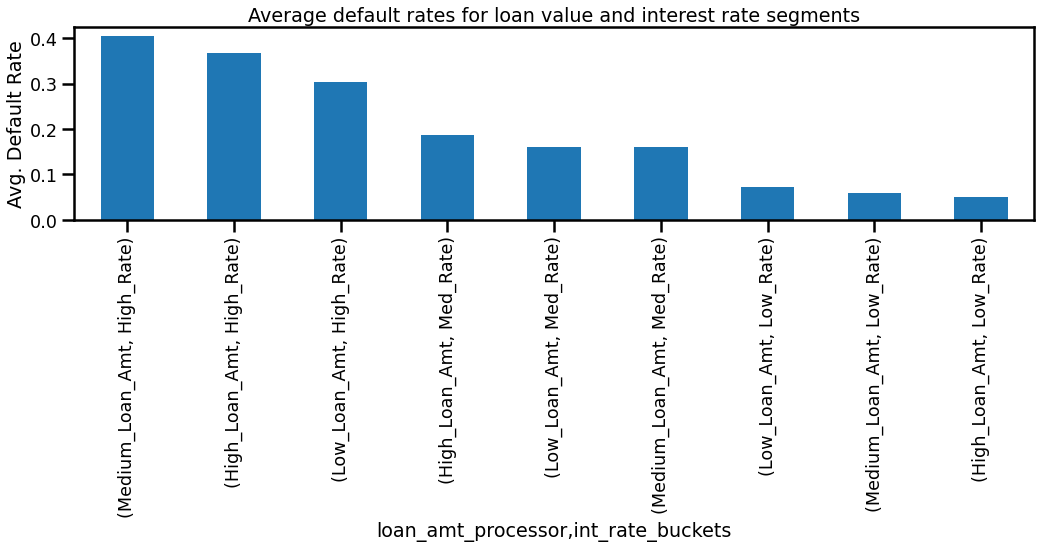

In [317]:
# Plotting default rates for loan_amount and int_rate combination
plt.figure(figsize=(15,8))
ax =df_loan_clean.groupby(['loan_amt_processor','int_rate_buckets' ])['loan_status_binary'].mean().sort_values(ascending=False).plot.bar()
ax.set_title('Average default rates for loan value and interest rate segments')
ax.set_ylabel('Avg. Default Rate')

plt.tight_layout()
plt.show()

- clients with mdedium loan amount (beween 5000 to 15000 USD(  and high interest rates ( >20%) are 40% of the loan defaulter.
- clients with high loan amount (> 15000 USD) and low interest rates (< 10%)are lowert defaulters - 

In [318]:
# Inorder to deal with the top emplyee titles, print a list of top 10 emplyee titles 
top10employee_count = df_loan_clean.emp_title.value_counts(normalize=False).head(10)
print(top10employee_count)

US Army              128
Bank of America      106
IBM                   65
AT&T                  57
Kaiser Permanente     55
Wells Fargo           52
UPS                   51
USAF                  51
US Air Force          50
Walmart               44
Name: emp_title, dtype: int64


In [319]:
df_loan_clean_top10_title = df_loan_clean[df_loan_clean.emp_title.isin(top10employee_count.index.values)]['emp_title'].sort_values()

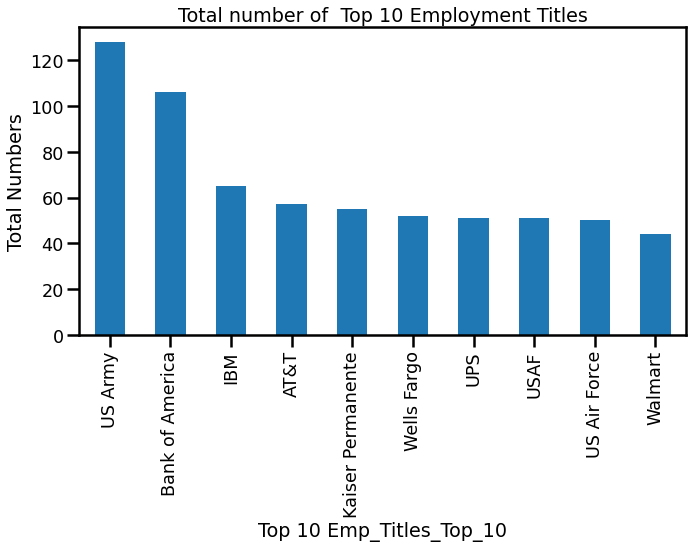

In [323]:
# Now plot the list of employment title with top 10 rankings
fig, ax = plt.subplots(figsize=(10,8))
df_loan_clean_top10_title.value_counts().plot.bar()
plt.xlabel('Top 10 Emp_Titles_Top_10')
plt.ylabel("Total Numbers")
plt.title('Total number of  Top 10 Employment Titles')
plt.tight_layout()
plt.show()

- US Army, BOA, and IBM are top3 name of the borrowers

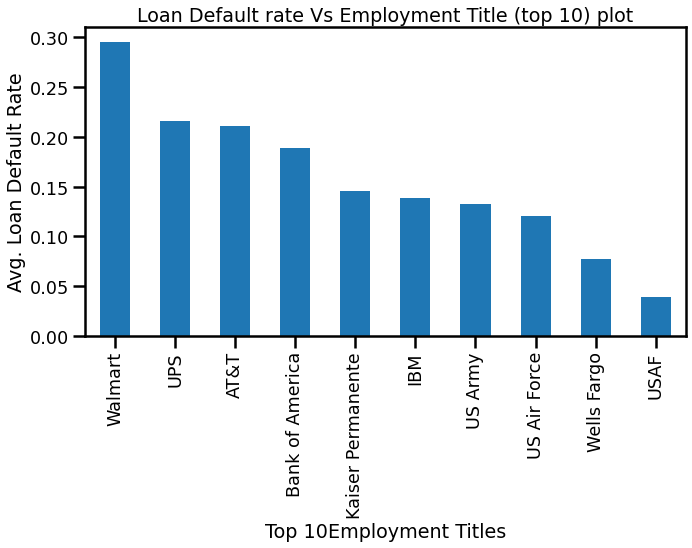

In [326]:
# Plot loan default rate by top 10 emp titles
fig, ax = plt.subplots(figsize=(10,8))
df_loan_clean[df_loan_clean.emp_title.isin(top10employee_count.index.values)].groupby('emp_title').loan_status_binary.mean().sort_values(ascending = False).plot.bar()
plt.xlabel('Top 10Employment Titles')
plt.ylabel("Avg. Loan Default Rate")
plt.title('Loan Default rate Vs Employment Title (top 10) plot')
plt.tight_layout()
plt.show()

- Walmart, UPS and AT&T are the top 3 loan defaulter with 30% and 20% default rates
- USAF and Wells Fargo are last in top 10 defaulter list

## 4.Deep dive for  important findings  <a id='4'></a>

In [328]:
# top 3 default categories are identified earlier these are "small_business","renewable_energy" and "educational"
   
top_default_purposes = ["small_business","renewable_energy","educational"
                       , "debt_consolidation"]
df_loan_clean_main_defalt_cat = df_loan_clean[df_loan_clean['purpose'].
                                        isin(top_default_purposes)]
df_loan_clean_main_defalt_cat['purpose'].value_counts()


debt_consolidation    16909
small_business         1351
educational             276
renewable_energy         87
Name: purpose, dtype: int64

In [330]:
# For the treatment of character variable a function is written for segmentation plots
def Segmentation_Plots(var):
    strX= var
    plt.figure(figsize=[15, 10])
    sns.barplot(x=strX, y="loan_status_binary", hue='purpose'
                ,data=df_loan_clean_main_defalt_cat, estimator=np.mean)
    plt.xlabel(var)
    plt.ylabel("Avgerage Loan Default Rate")
    plt.title("Segmentation Plot for  Default Rate vs."+" "+var)

    plt.tight_layout()
    plt.show()

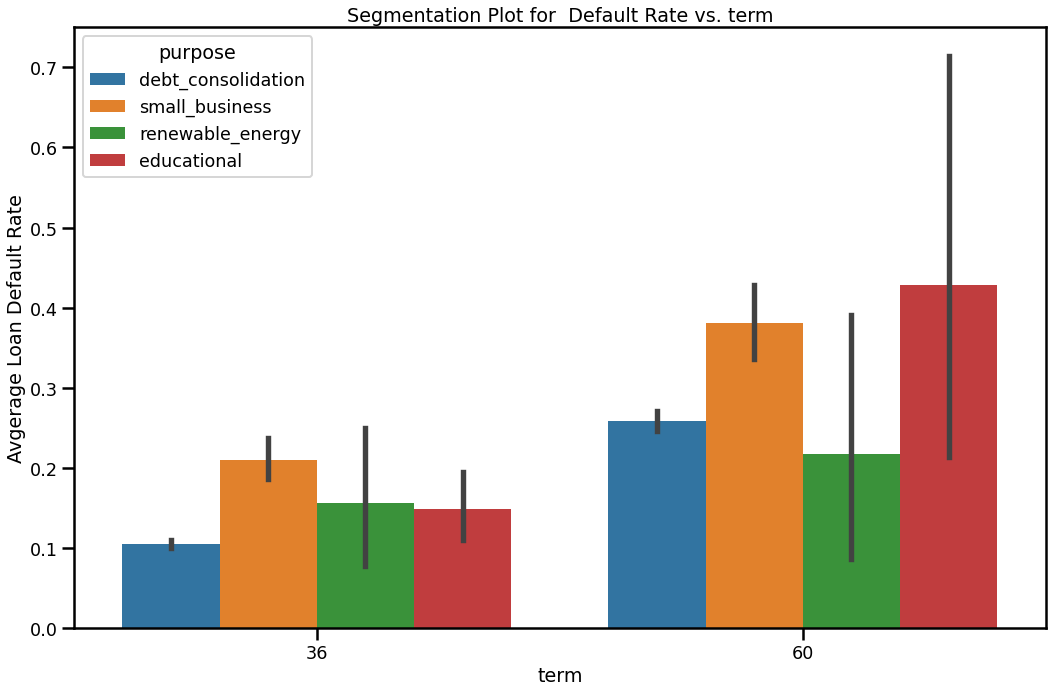

In [331]:
#Segmention  Plots for term vs. Default Rate
Segmentation_Plots('term')

- in 36 months term loan, the highrst defalt rate is 20% for small business, while lowest is 10% for dept_consideration
- for 60 months term loan, the educational is highest defalter (43%), followed by small business is next higher (40%)

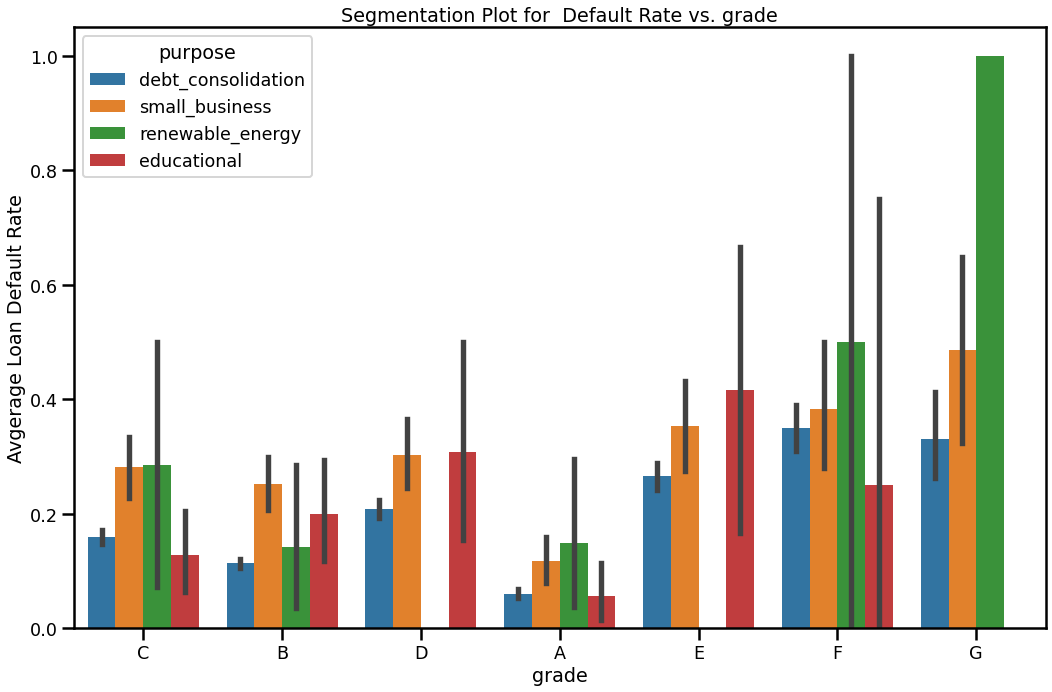

In [333]:
 #grade vs. Default Rate Segmentation plots
  
Segmentation_Plots('grade')

- For Grade G and reneable energy, the loan default rate is highest.
- Next Highest defaulter is Small business in almost all grades
- Grade A has lowest category of defaulters

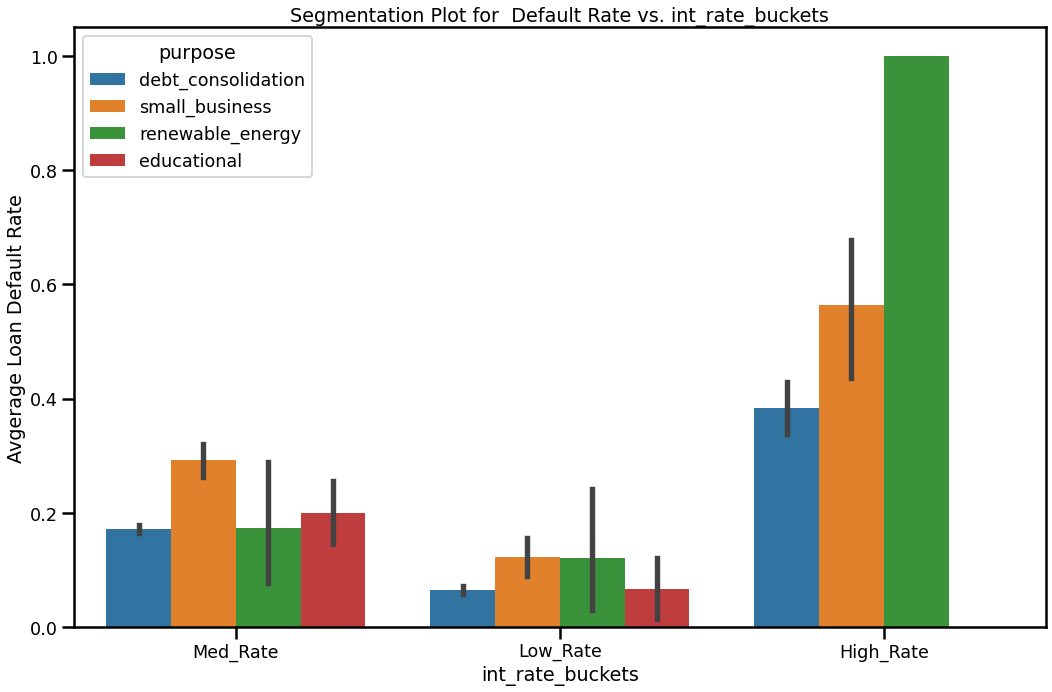

In [335]:
# Plot for int rate buckets versus default rate for top default purpose categories
 
Segmentation_Plots('int_rate_buckets')

- For High interest rate buckets, Renewable Energy is the largest defaulter
- For Medium rate, Small Business is the highest defauter
_  For low interest rate, the number of defaulters are least

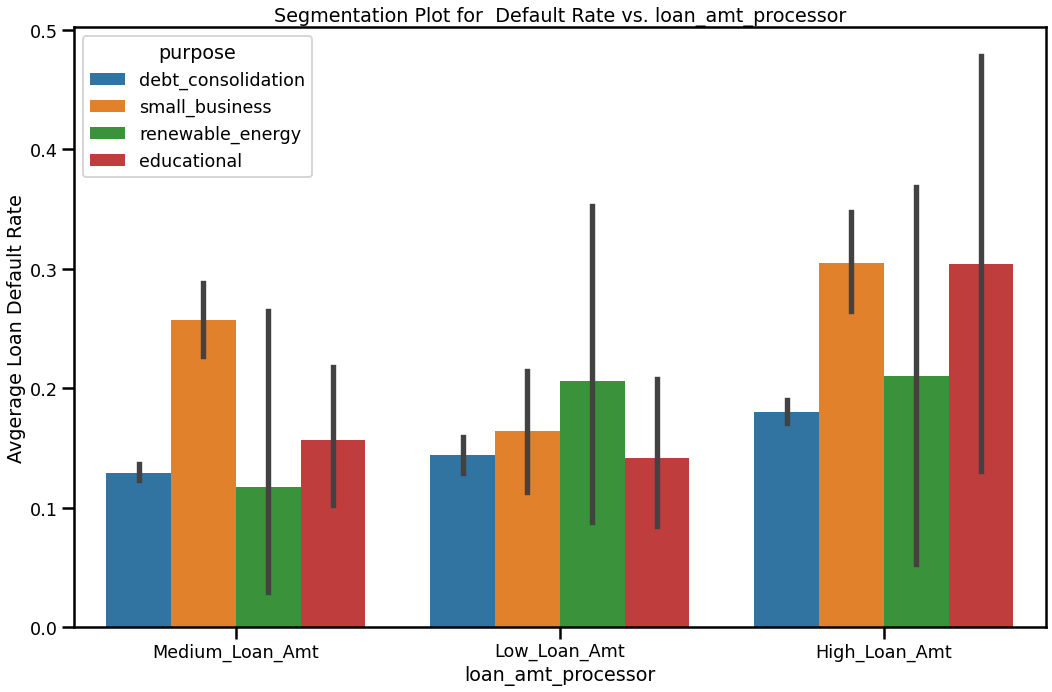

In [336]:
Segmentation_Plots('loan_amt_processor')

- Small Business is the largest defaulter rate for average loan defaut rate for medium loan amount
- For High loan amount, the small busisness and educational are the highrst defaulter

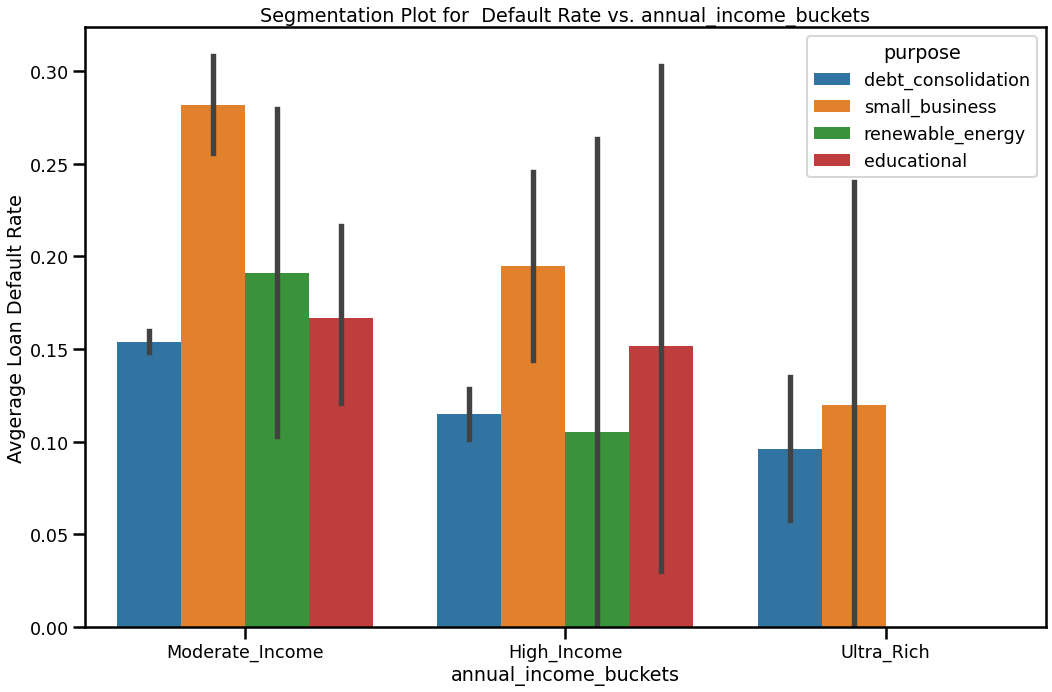

In [337]:
Segmentation_Plots('annual_income_buckets')

- For moderate income group , average loan default rate is highest for small business
- For Ultra rich income group also small besiness is the highest defaulter.

## 5. Bivariate Analysis  <a id='5'></a>

- Detailed bivariate analysis is taken up by diving the features/ plots in the following six broad categories.

- Each main category is further subdivided into 4 or 5 subcategories to support the plots and explrations.

- Loan Amout Related Plots

- Loan Amout Related Plots with hue = Term

- Interest Rates & Installment Related Plots

- Metric Related Plots

- Correlations and Heat Maps



In [341]:
Variable_Bivar_Ana = [ 'loan_amnt'   ,'int_rate'
                  ,'installment'
                  ,'total_pymnt'
                  ,'annual_inc'  
                  ,'dti'
                  ,'loan_status'
                  ]

In [343]:
def BiVar_Pair_Plots(Variable_Bivar_Ana):

    df_pair_plot = df_loan_clean[Variable_Bivar_Ana]
    g= sns.pairplot(df_pair_plot
                   ,hue='loan_status'
                   ,plot_kws=dict(s=20, edgecolor="b", linewidth=0.5)
                   ,palette="husl"
                   ,markers=["o", "s"])

    handles = g._legend_data.values()
    labels = g._legend_data.keys()

    #g.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=1)
    #g.fig.legend(handles=handles, labels=labels, loc='lower center', ncol=3)
    g.fig.legend(handles=handles, labels=labels, loc='upper left', ncol=3)
    g.fig.subplots_adjust(top=0.92, bottom=0.08)

    g.fig.set_figheight(8)
    g.fig.set_figwidth(10)
    
    plt.xscale('log')
    plt.yscale('log')
    
    plt.tight_layout()
    plt.show()

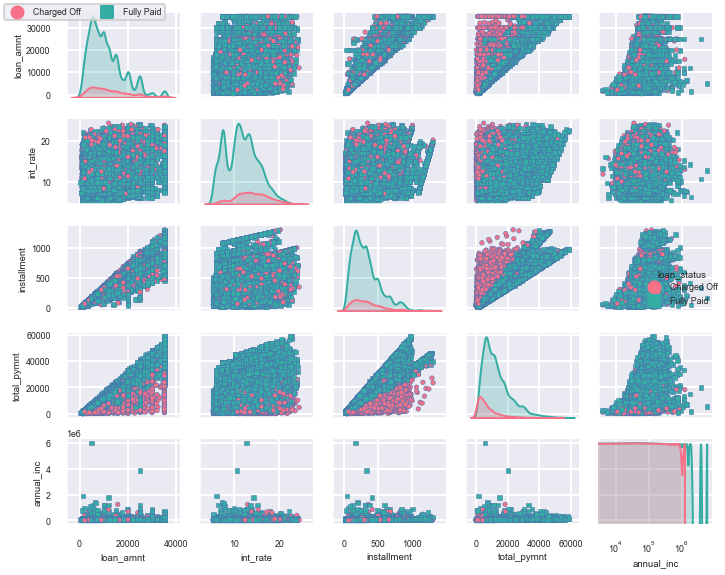

In [392]:
sns.set_context('poster',font_scale=0.4)
BiVar_Pair_Plots(Variable_Bivar_Ana)

It is difficult to draw infeences from above scatter plots. So we will go into details of indivisual parameters into following sections

Loan Amount related Plots

In [ ]:
sns.set_context('poster',font_scale=0.8)

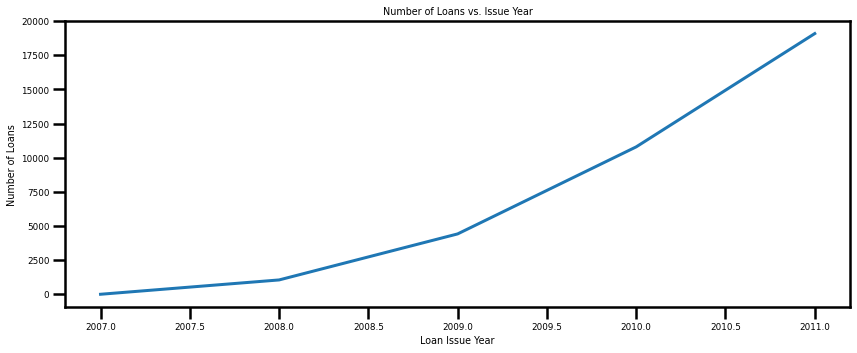

In [347]:
#No of loans over time
plt.figure(figsize=(12,5))
df_loan_clean.groupby('issue_d_year').loan_amnt.count().plot(kind='line')

plt.xlabel('Loan Issue Year')
plt.ylabel("Number of Loans")
plt.title('Number of Loans vs. Issue Year')

plt.tight_layout()
plt.show()

- Number of loans issued by company are growing over the years. Ths shows the good financial health of the system

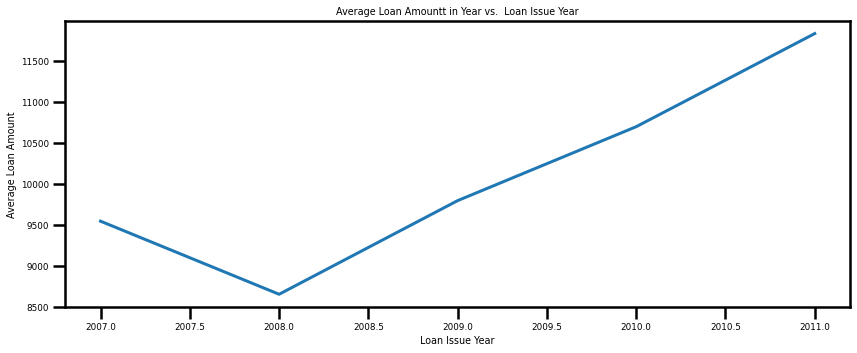

In [348]:
# Avg loan amount over time
plt.figure(figsize=(12,5))
df_loan_clean.groupby('issue_d_year').loan_amnt.mean().plot(kind='line')

plt.xlabel('Loan Issue Year')
plt.ylabel("Average Loan Amount")
plt.title('Average Loan Amountt in Year vs.  Loan Issue Year')

plt.tight_layout()
plt.show()

- Average loan amunt decreases upto 2008 and then it areases linearly. This may be due to gloabal recession but need investigation

In [ ]:
# sum of loan amount over time
plt.figure(figsize=(12,5))
df_loan_clean.groupby('issue_d_year').loan_amnt.sum().plot(kind='line')

plt.xlabel('Loan Issue Year')
plt.ylabel("Sum of Loan Amount")
plt.title('Total Loan Amount per Year vs. Issue Year')
#plt.xscale('log')
#plt.yscale('log')
plt.tight_layout()
plt.show()

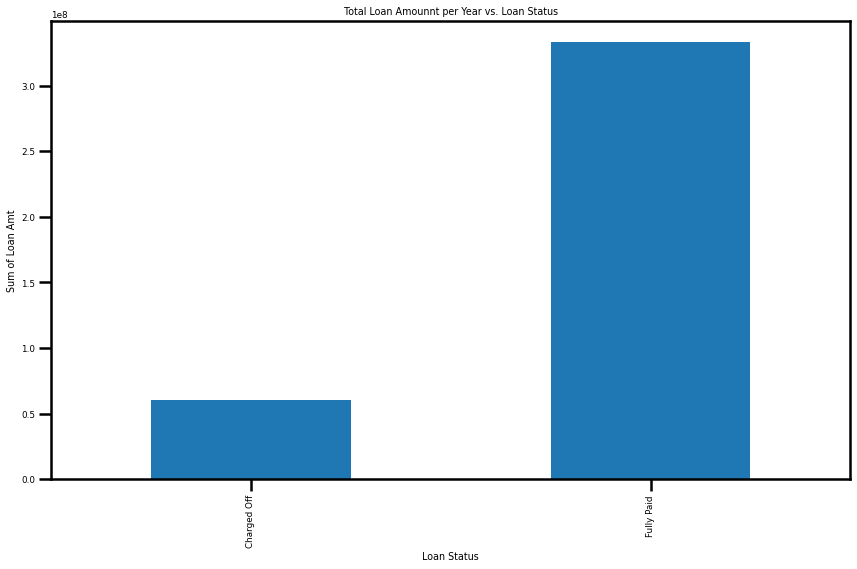

In [350]:
#Sum of loans vs. loan status - current, fully paid, charged off
plt.figure(figsize=(12,8))
df_loan_clean.groupby('loan_status').loan_amnt.sum().plot(kind='bar')

plt.xlabel('Loan Status')
plt.ylabel("Sum of Loan Amt")
plt.title('Total Loan Amounnt per Year vs. Loan Status')
#plt.xscale('log')
#plt.yscale('log')
plt.tight_layout()
plt.show()

- Sum of loan amount for fully paid loan is much higher than charged off loan

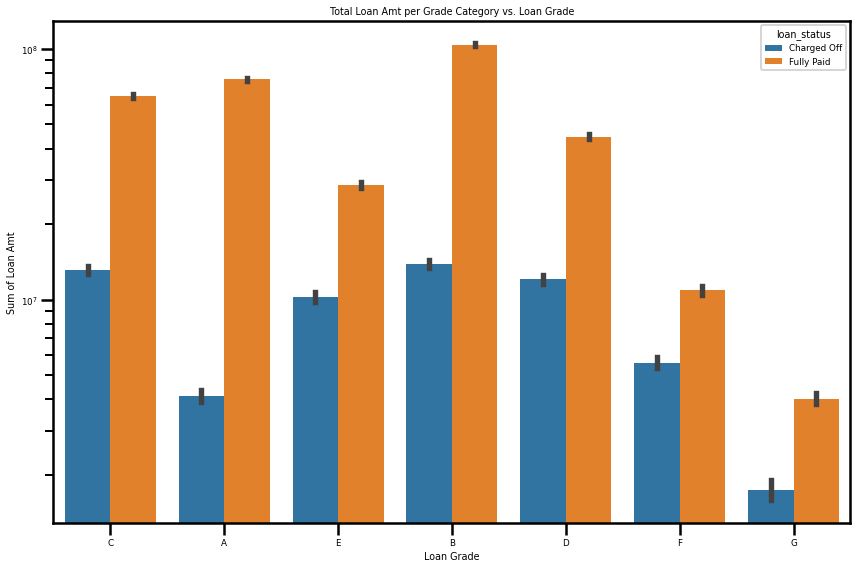

In [351]:
#  Sum of Loan Amount vs. grade
# sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=master_loan, estimator=np.mean)

plt.figure(figsize=(12,8))
sns.barplot(x='grade', y='loan_amnt', hue="loan_status", data=df_loan_clean, estimator=np.sum)
plt.xlabel('Loan Grade')
plt.ylabel("Sum of Loan Amt")
plt.title('Total Loan Amt per Grade Category vs. Loan Grade')
#plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()

- Highest Fully paid loans are in the category of A, B and C
- The grade G has highest risk for the business

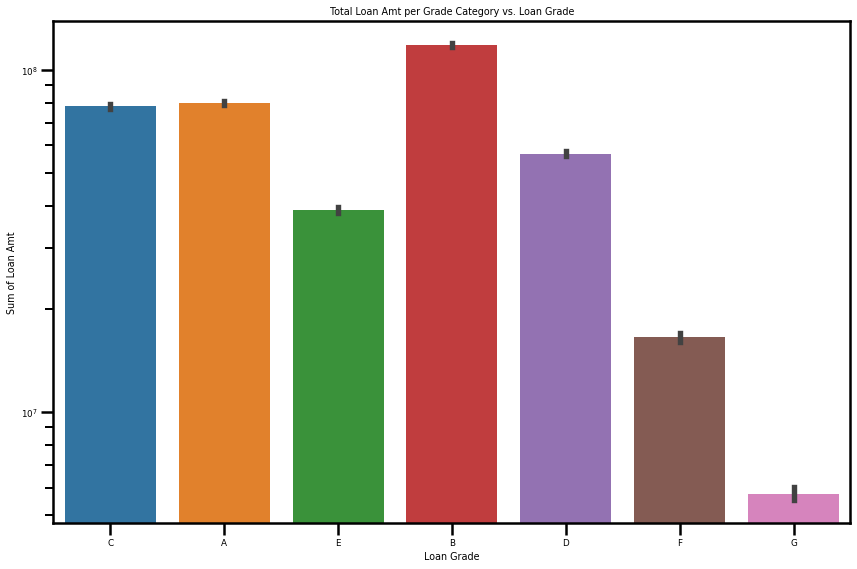

In [352]:
#  Total Loan amount vs Grade  

plt.figure(figsize=(12,8))
#clean_loan.groupby('loan_status').loan_amnt.sum().plot(kind='bar')
sns.barplot(x='grade', y='loan_amnt',  data=df_loan_clean, estimator=np.sum)
plt.xlabel('Loan Grade')
plt.ylabel("Sum of Loan Amt")
plt.title('Total Loan Amt per Grade Category vs. Loan Grade')
#plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()

 Total Loan amount vs Grade vs hue = Term

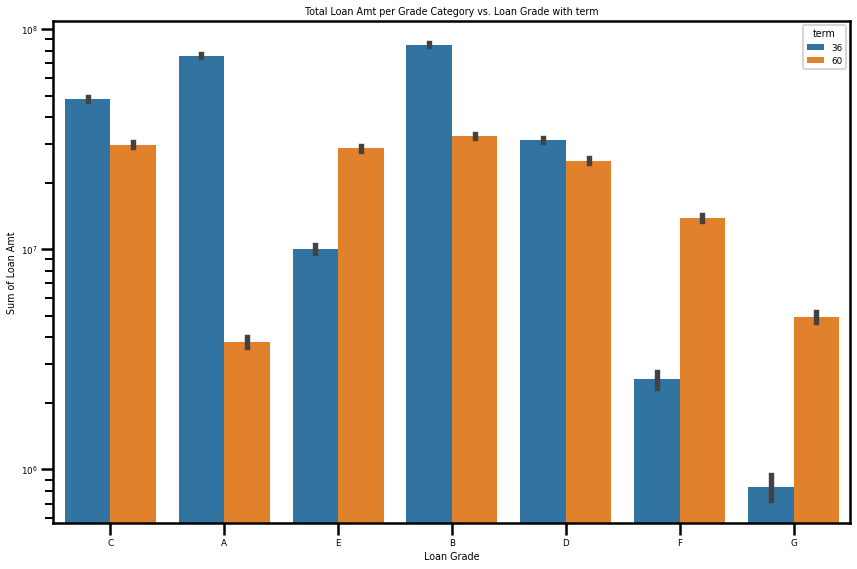

In [353]:
#  Total Loan amount vs Grade vs hue = Term

plt.figure(figsize=(12,8))
#clean_loan.groupby('loan_status').loan_amnt.sum().plot(kind='bar')
sns.barplot(x='grade', y='loan_amnt', hue="term", data=df_loan_clean, estimator=np.sum)
plt.xlabel('Loan Grade')
plt.ylabel("Sum of Loan Amt")
plt.title('Total Loan Amt per Grade Category vs. Loan Grade with term')
#plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()

- For the Grade B, the 36 term loan is highest. For grade B and C, the 60 months term lon is highest for sum of loan amount

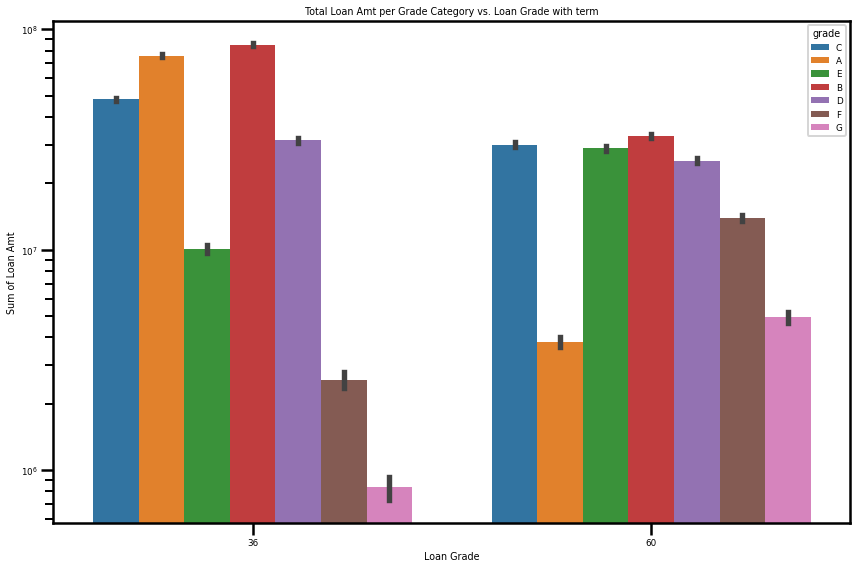

In [354]:
# Total Loan amount vs Term with hue ='grade'

plt.figure(figsize=(12,8))
#clean_loan.groupby('loan_status').loan_amnt.sum().plot(kind='bar')
sns.barplot(x='term', y='loan_amnt', hue="grade", data=df_loan_clean, estimator=np.sum)
plt.xlabel('Loan Grade')
plt.ylabel("Sum of Loan Amt")
plt.title('Total Loan Amt per Grade Category vs. Loan Grade with term')
#plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()

- Grade A is highest sum of loan amount for 36 months loan term
- Grade B is the highest sum for loan amount for 60months of loan term

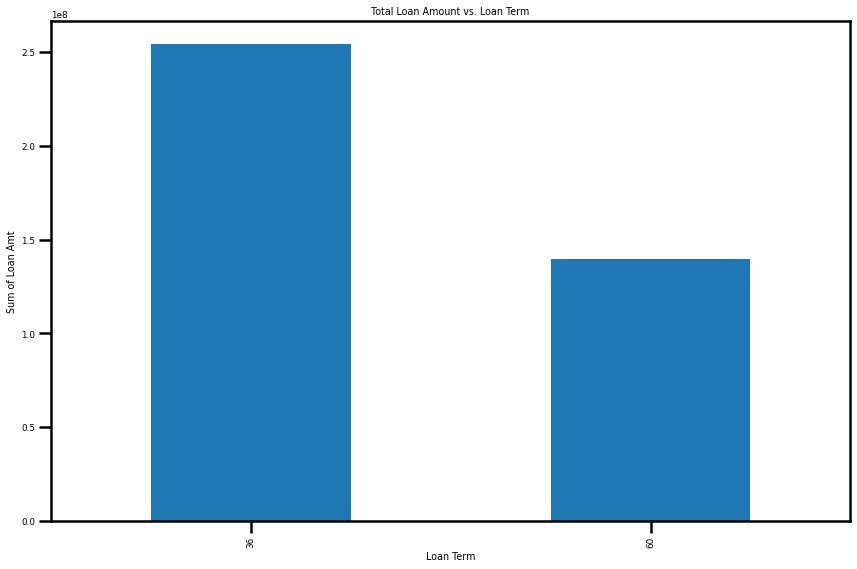

In [355]:
#5.2.1.3 Total Loan amount vs Term  

#1.4 Sum of loans vs. loan status - current, fully paid, charged off
plt.figure(figsize=(12,8))
df_loan_clean.groupby('term').loan_amnt.sum().plot(kind='bar')

plt.xlabel('Loan Term')
plt.ylabel("Sum of Loan Amt")
plt.title('Total Loan Amount vs. Loan Term')
#plt.xscale('log')
#plt.yscale('log')
plt.tight_layout()
plt.show()

- Total loan amount for 36 months is much higher than 60 months term period

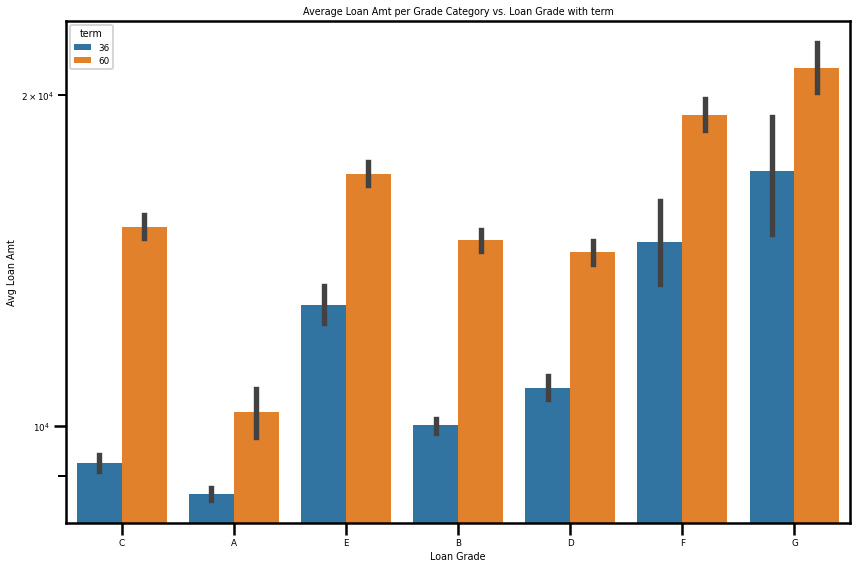

In [357]:
#  Avg Loan amount vs Grade vs hue = Term

plt.figure(figsize=(12,8))
sns.barplot(x='grade', y='loan_amnt', hue="term", data=df_loan_clean, estimator=np.mean)
plt.xlabel('Loan Grade')
plt.ylabel("Avg Loan Amt")
plt.title('Average Loan Amt per Grade Category vs. Loan Grade with term')
#plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()

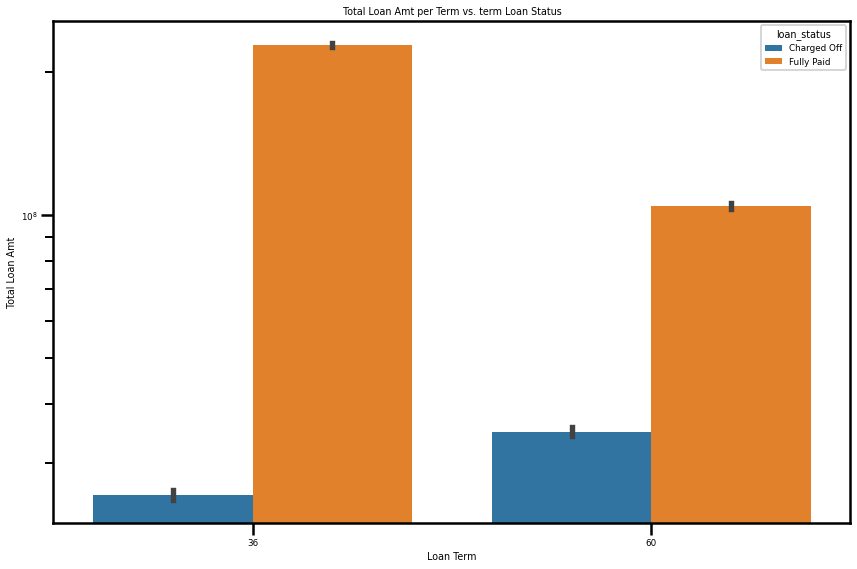

In [358]:
# Total Loan amount Vs  term with hue = Loan Status

plt.figure(figsize=(12,8))
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=df_loan_clean, estimator=np.sum)
plt.xlabel('Loan Term')
plt.ylabel("Total Loan Amt")
plt.title('Total Loan Amt per Term vs. term Loan Status')
#plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()

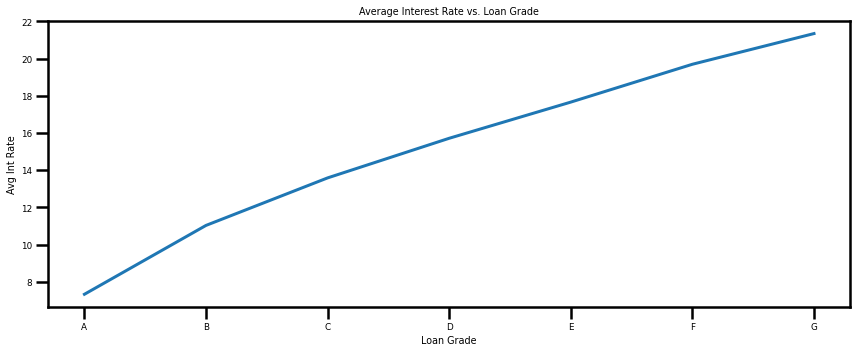

In [359]:
# Interest Rate vs. grade
plt.figure(figsize=(12,5))
df_loan_clean.groupby('grade').int_rate.mean().plot(kind='line')

plt.xlabel('Loan Grade')
plt.ylabel("Avg Int Rate")
plt.title('Average Interest Rate vs. Loan Grade')

plt.tight_layout()
plt.show()

-Average interest rates are increasing with loan grades

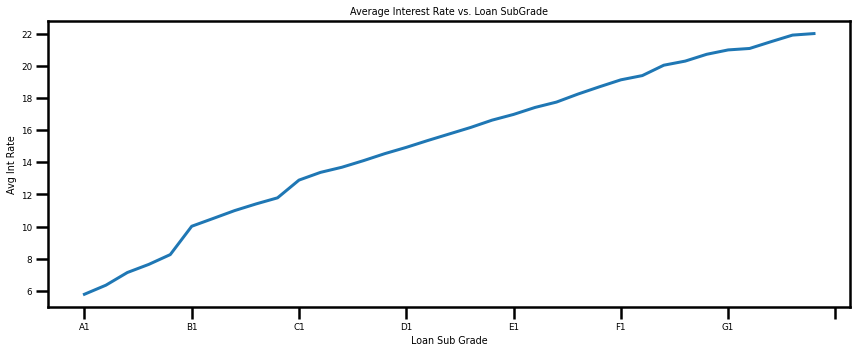

In [360]:
#  Interest Rate and Sub Grade
plt.figure(figsize=(12,5))
df_loan_clean.groupby('sub_grade').int_rate.mean().plot(kind='line')

plt.xlabel('Loan Sub Grade')
plt.ylabel("Avg Int Rate")
plt.title('Average Interest Rate vs. Loan SubGrade')

plt.tight_layout()
plt.show()

In [ ]:
-Average interest rates are increasing with loan sub grades

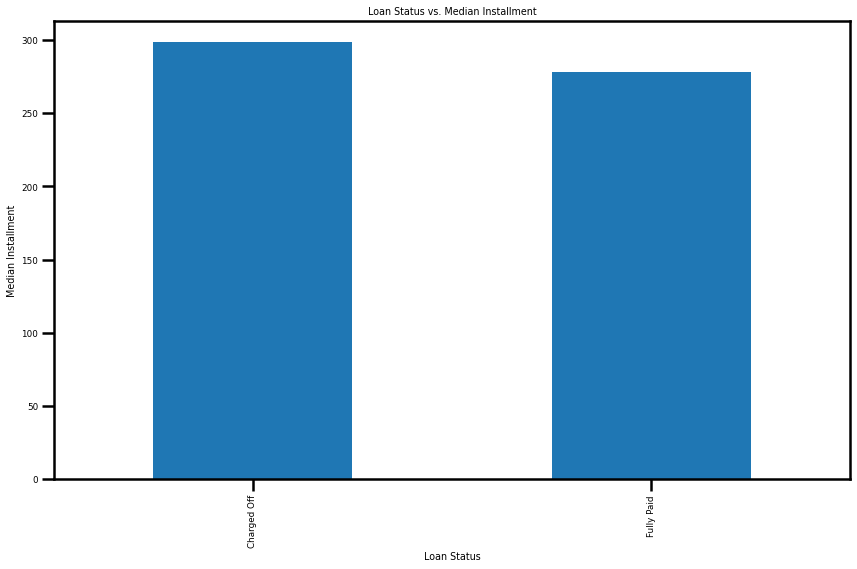

In [362]:
# Median Installment vs. loan status
plt.figure(figsize=(12,8))
df_loan_clean.groupby('loan_status').installment.median().plot(kind='bar')

plt.xlabel('Loan Status')
plt.ylabel("Median Installment")
plt.title('Loan Status vs. Median Installment')

plt.tight_layout()
plt.show()

- Median instalment is highest for charged off loan

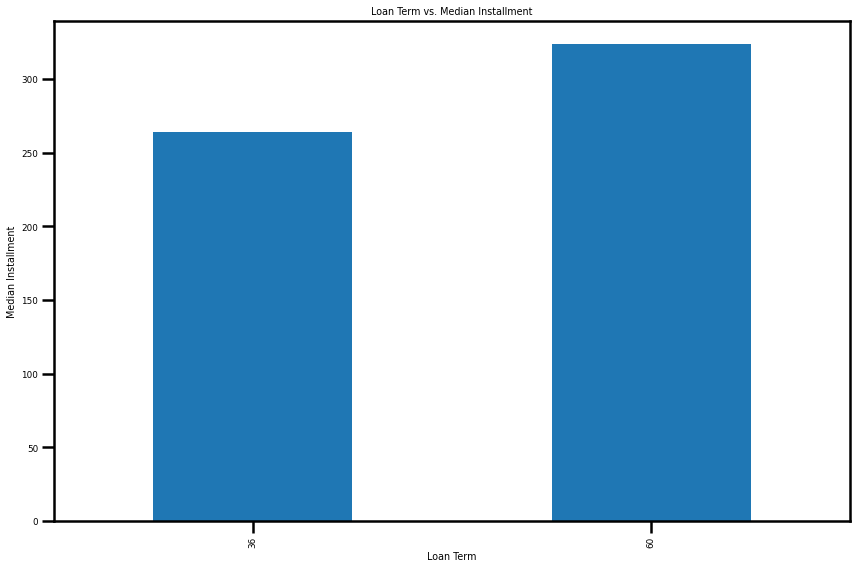

In [363]:
#  Median Installment vs. loan Term
plt.figure(figsize=(12,8))
df_loan_clean.groupby('term').installment.median().plot(kind='bar')

plt.xlabel('Loan Term')
plt.ylabel("Median Installment")
plt.title('Loan Term vs. Median Installment')

plt.tight_layout()
plt.show()

- Median instalment is highest for 60 months loan term.

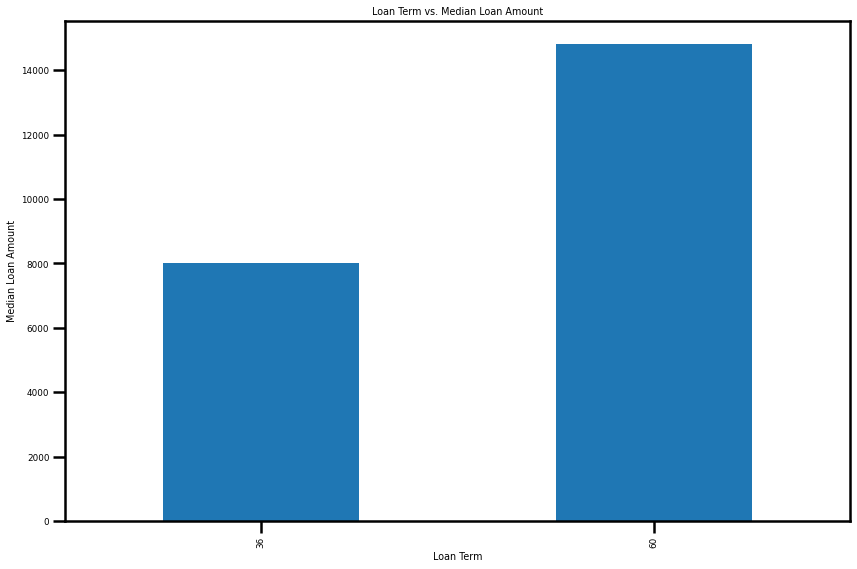

In [364]:
#  Median Loan Amount vs. loan Term
plt.figure(figsize=(12,8))
df_loan_clean.groupby('term').loan_amnt.median().plot(kind='bar')

plt.xlabel('Loan Term')
plt.ylabel("Median Loan Amount")
plt.title('Loan Term vs. Median Loan Amount')

plt.tight_layout()
plt.show()

- Median loan amount is highest for 60 months loan term

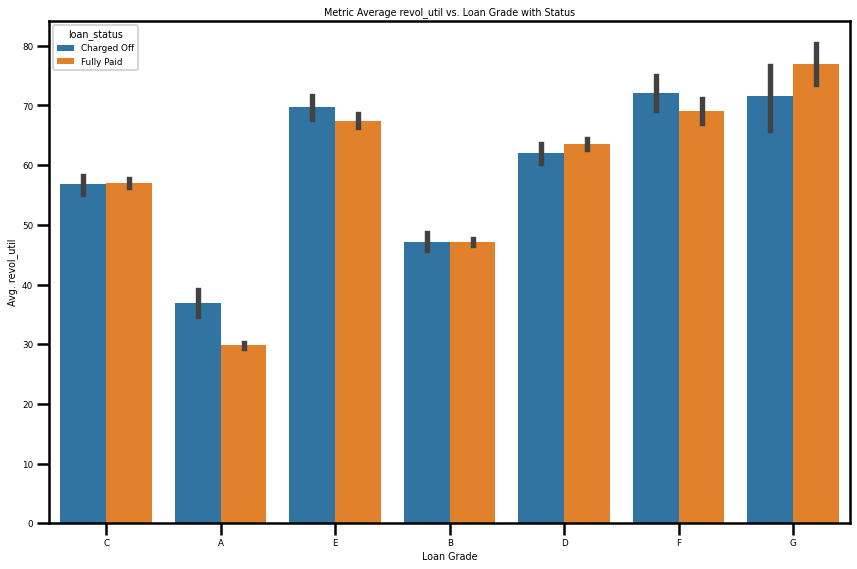

In [365]:
# Avg revol_util Vs grade Vs hue = Loan Staus

plt.figure(figsize=(12,8))

sns.barplot(x='grade', y='revol_util', hue="loan_status", data=df_loan_clean, estimator=np.mean)
plt.xlabel('Loan Grade')
plt.ylabel("Avg. revol_util")
plt.title('Metric Average revol_util vs. Loan Grade with Status')
#plt.xscale('log')
#plt.yscale('log')
plt.tight_layout()
plt.show()

- Average revolving utility is highest for Grade G of loan.

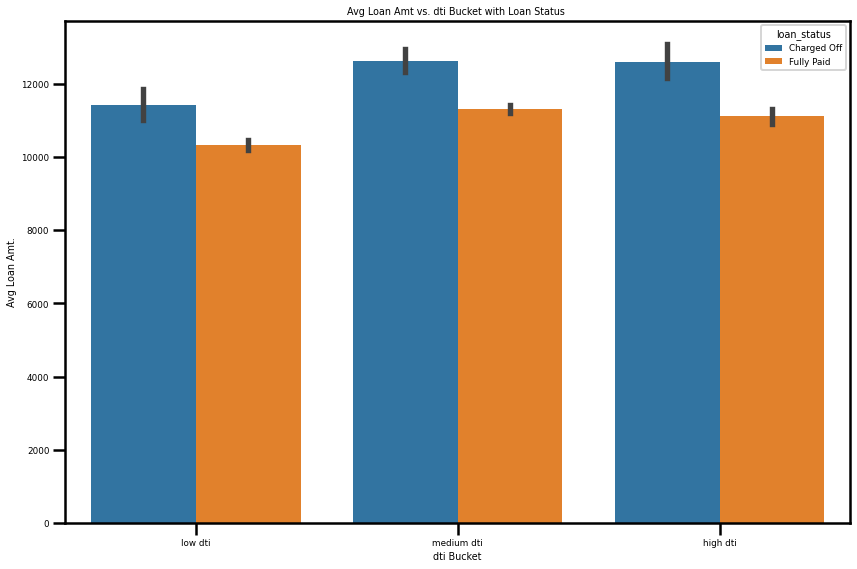

In [366]:
# Avg Loan Amt. vs. vs dti vs hue = Loan Status


plt.figure(figsize=(12,8))

sns.barplot(x='dti', y='loan_amnt', hue="loan_status", data=df_loan_clean, estimator=np.mean)
plt.xlabel('dti Bucket')
plt.ylabel("Avg Loan Amt.")
plt.title(' Avg Loan Amt vs. dti Bucket with Loan Status  ')

plt.tight_layout()
plt.show()

For medium and high DTI ratio, the charged off average loan amount is maximum

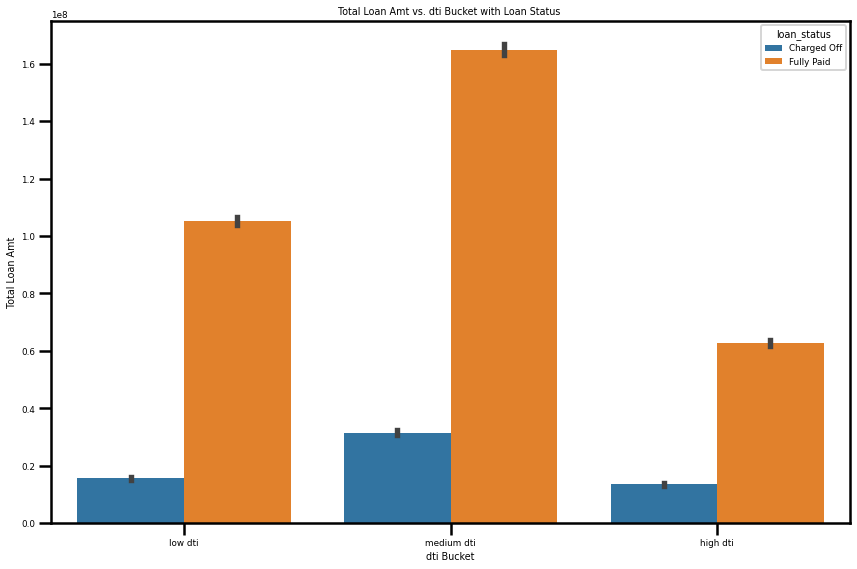

In [367]:
# Total Loan Amt. vs. vs dti vs hue = Loan Status


plt.figure(figsize=(12,8))

sns.barplot(x='dti', y='loan_amnt', hue="loan_status", data=df_loan_clean, estimator=np.sum)
plt.xlabel('dti Bucket')
plt.ylabel("Total Loan Amt")
plt.title(' Total Loan Amt vs. dti Bucket with Loan Status  ')

plt.tight_layout()
plt.show()

- For Medium dt buckets, the fully paid loan amount is maximum. For high dti ratio, the charged off loan is minimum

## 6. Heat Maps  <a id='6'></a>

In [373]:
#6.1 General Heat Map

Hear_map_corr_var = ['loan_amnt', 'term', 'int_rate', 'installment'
               , 'emp_length','annual_inc', 'zip_code'
               ,'delinq_2yrs', 'inq_last_6mths', 'open_acc'
               , 'pub_rec', 'revol_bal', 'revol_util', 'total_acc'
               , 'total_pymnt', 'total_pymnt_inv','last_pymnt_amnt'
               , 'issue_d_year','earliest_cr_line_year'
               , 'last_pymnt_d_year', 'last_credit_pull_d_year','loan_status_binary'
               ]
Hear_map_corr_mat = df_loan_clean[Hear_map_corr_var].corr()

<AxesSubplot:>

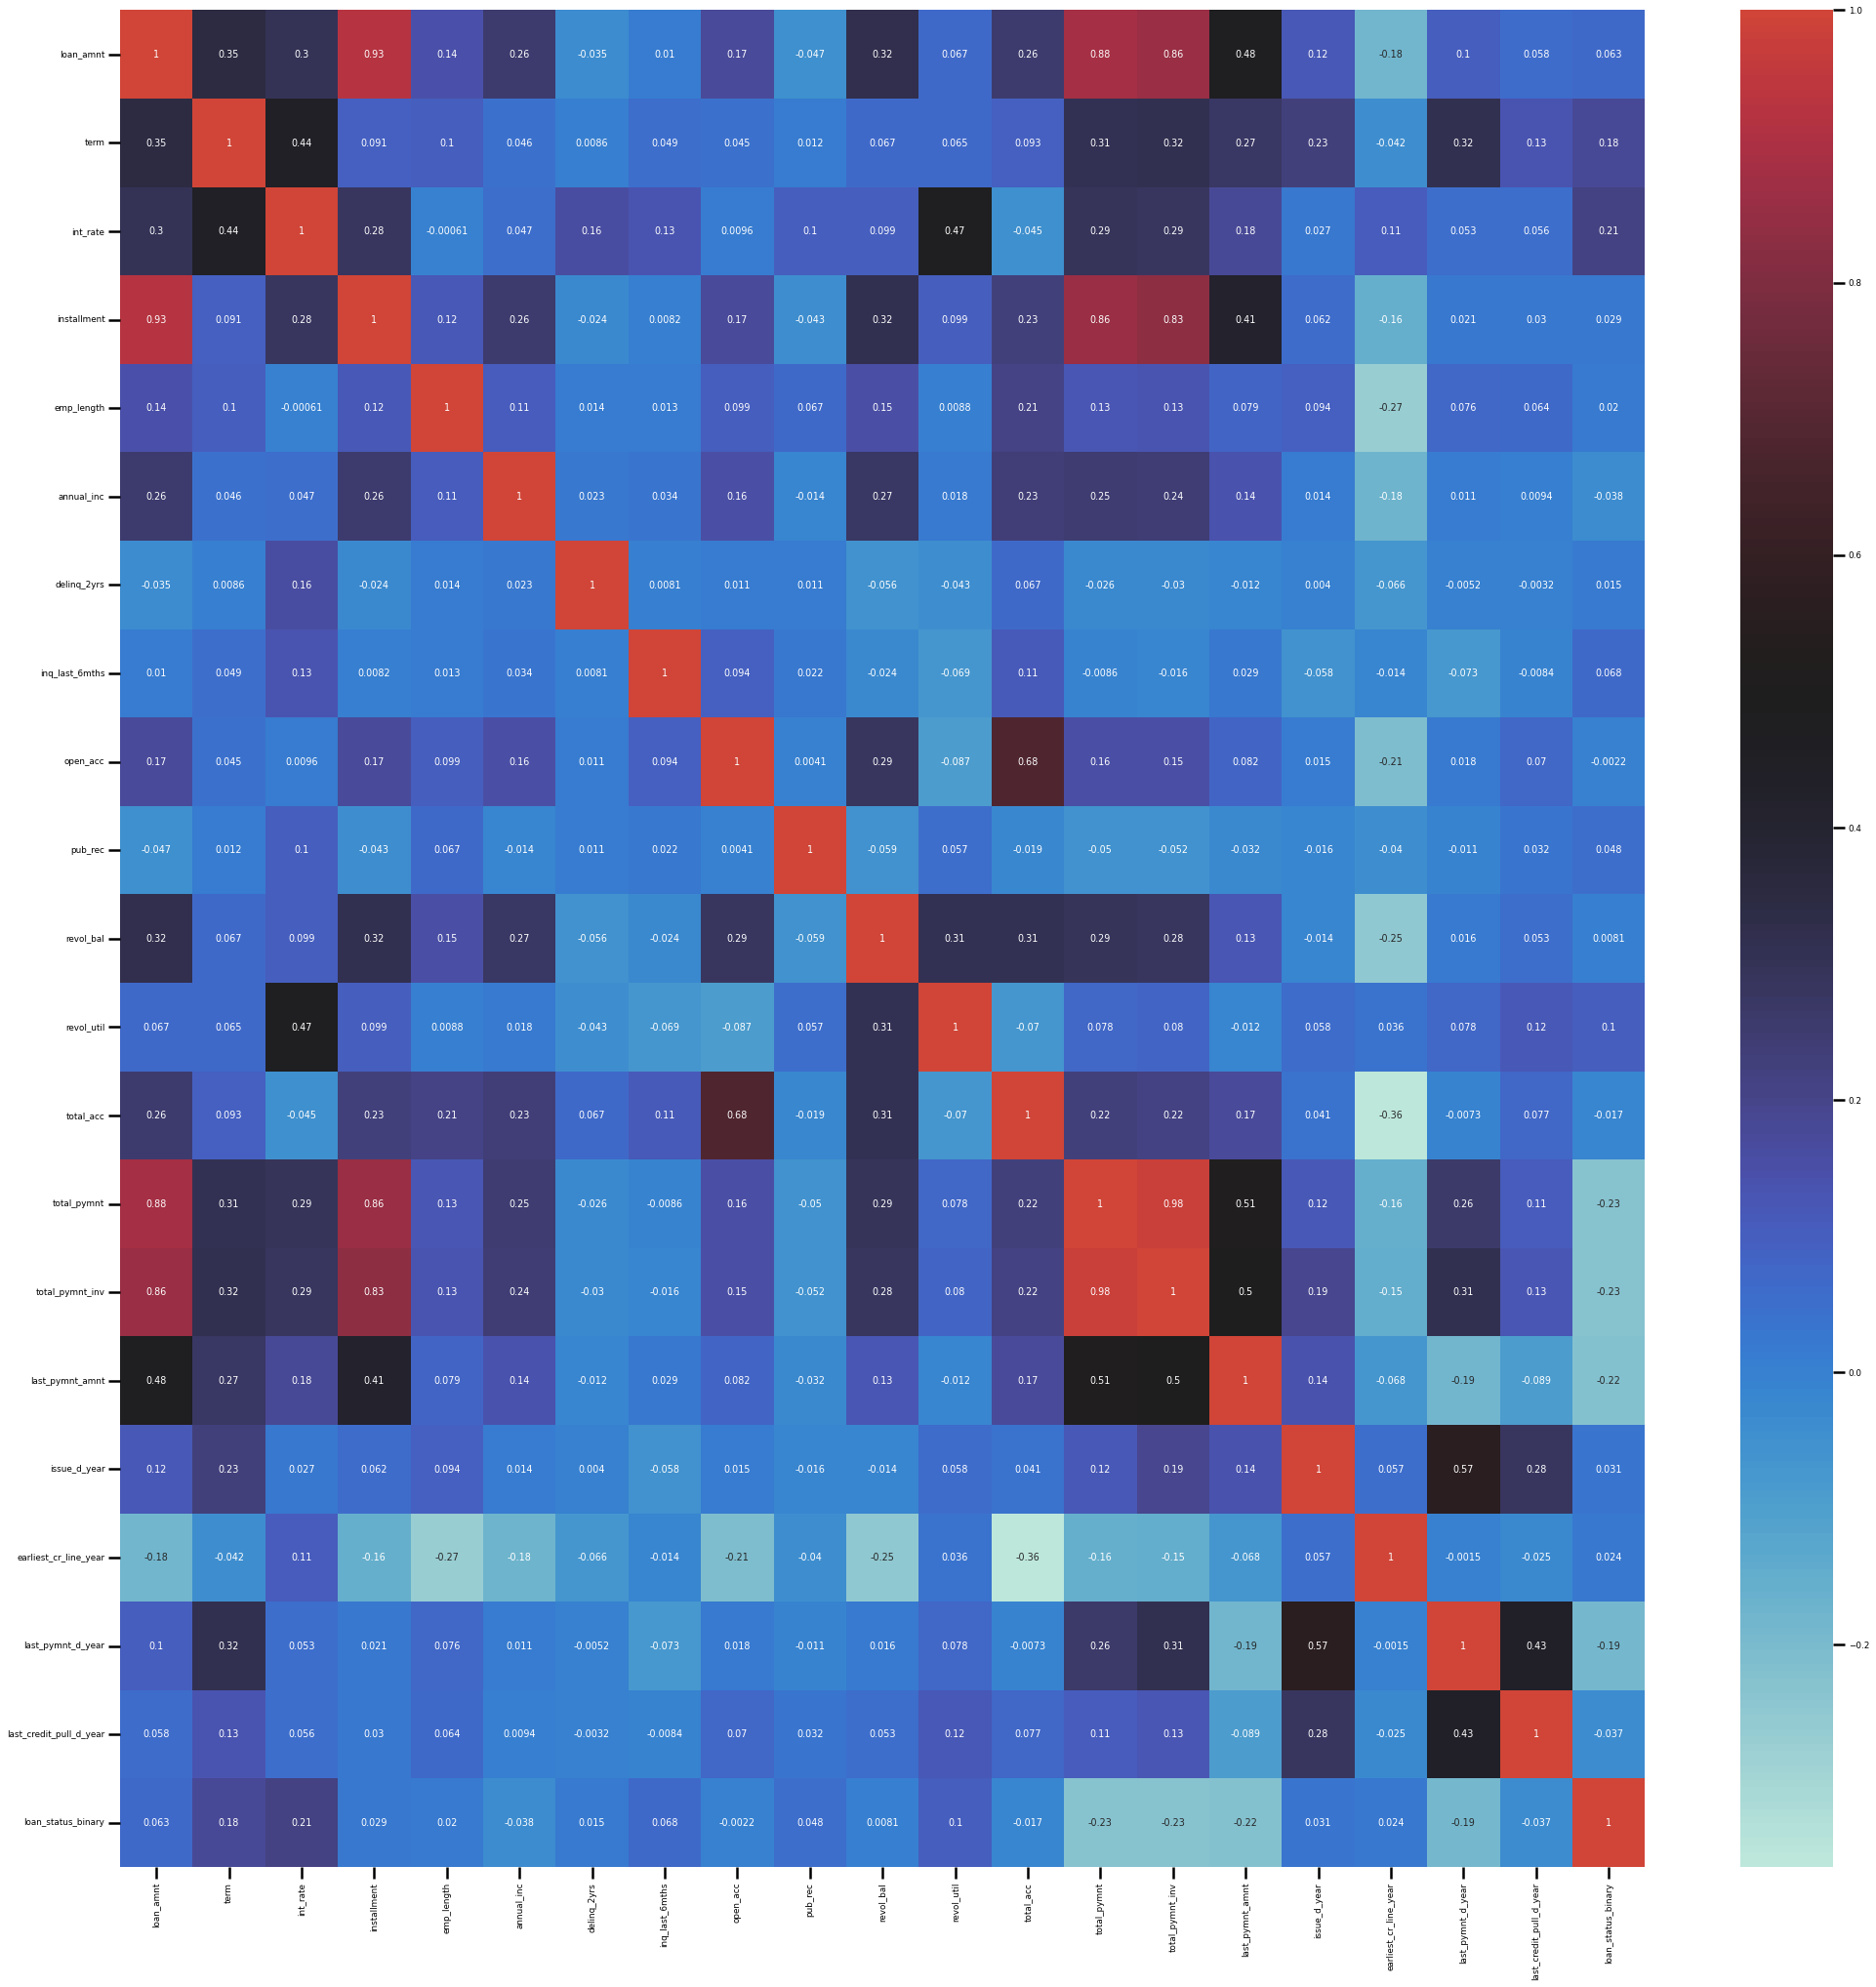

In [378]:
#Plot the general heat map
plt.figure(figsize=(35,35))
sns.heatmap(Hear_map_corr_mat, annot=True, center=0.5)

- loan_amnt and total_pymnt have a correlation of 0.88, installment and total_payment have a correlation of 0.83, installment and loan amount have a correlation of 0.88 ,we will explore them further in next section

C:\Users\Shailesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x1440 with 0 Axes>

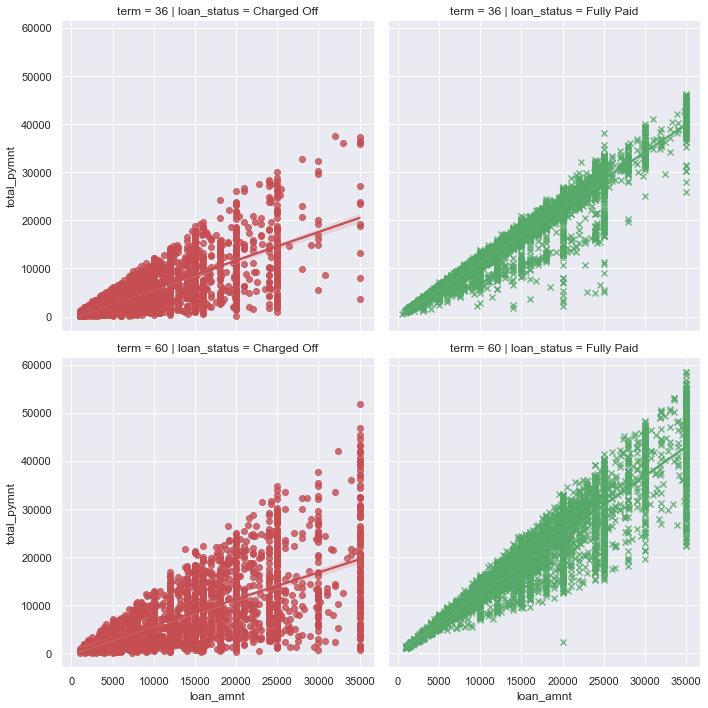

In [379]:
Dict = dict({'Fully Paid': 'g', 'Charged Off': 'r'}) 
sns.set(style="ticks")
sns.set(color_codes=True)
plt.figure(figsize=(12,20))

sns.lmplot("loan_amnt", "total_pymnt", data=df_loan_clean
           , col='loan_status',row = 'term'
           , fit_reg=True, hue="loan_status" 
           ,markers=["o", "x"]
          , palette=Dict)

plt.tight_layout()
plt.show()

C:\Users\Shailesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x1440 with 0 Axes>

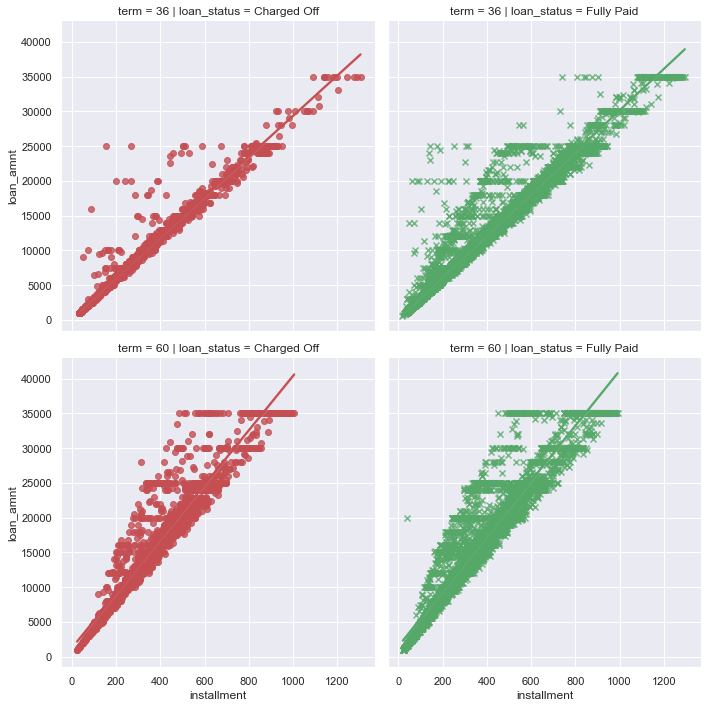

In [380]:
Dict = dict({'Fully Paid': 'g', 'Charged Off': 'r'}) 
sns.set(style="ticks")
sns.set(color_codes=True)
plt.figure(figsize=(12,20))

sns.lmplot("installment", "loan_amnt", data=df_loan_clean
           , col='loan_status', row = 'term'
           , fit_reg=True, hue="loan_status" 
           ,markers=["o", "x"]
          , palette=Dict)

plt.tight_layout()
plt.show()

C:\Users\Shailesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 864x1440 with 0 Axes>

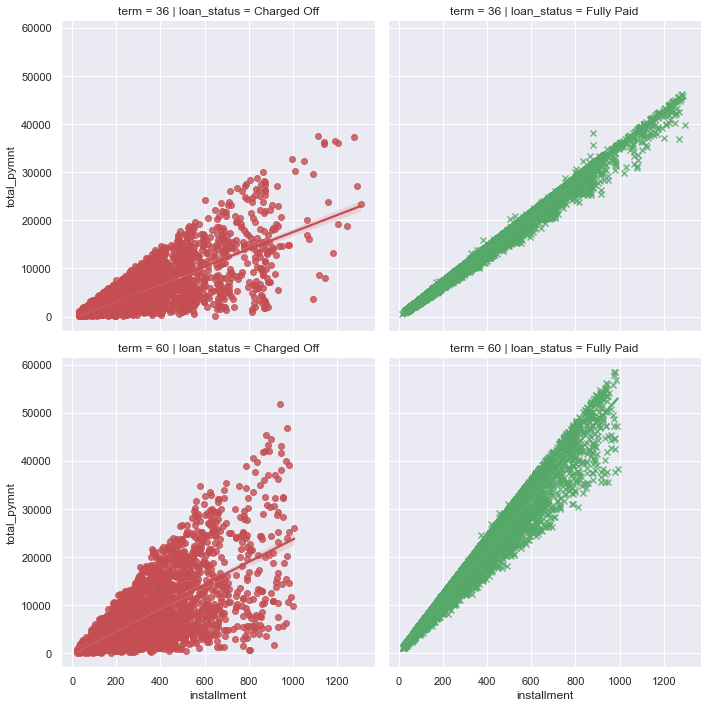

In [381]:
Dict = dict({'Fully Paid': 'g', 'Charged Off': 'r'}) 
sns.set(style="ticks")
sns.set(color_codes=True)
plt.figure(figsize=(12,20))

sns.lmplot("installment", "total_pymnt", data=df_loan_clean
           , col='loan_status', row = 'term'
           , fit_reg=True, hue="loan_status" 
           ,markers=["o", "x"]
          , palette=Dict)

plt.tight_layout()
plt.show()


## Inferences:

- installment vs. total playment plot provides the most meaningful insite for the interdependecies.
- The ratio of avgerage total payment vs avg. installment is higher for charged off loans  for all loan buckets. 
- It is recommended to devide the range of loan amounts into more number of buckets ( > 10 ) 

## 7. Analyst's Recommendations <a id='8'></a>

## Driving factors behind loan default are as follows:

- <b> Annual Income </b> – Salary <  0.1 million usd has a higher risk of loan defulter. Less anaualincome more default.
- <b> Loan Interest Rate </b> – Interest rate greater than 14% results into higher default rates. High interest rate, higher the risk of the default
- <b> Applicant Grade </b>– Grade A , low default, Grade G more default rate
- <b> Loan Term </b> – 36 months term have low risk and 60 months have high risk
- <b> Purpose of Loan </b> – Small Business pose the highest risk of default (25%),   Renewable Energy(17%) and Education (15%)

The Company Portfolio and risk assessment should be considered based on the above factors

## Major Findings


-  The loan status shows that the 60% of the loans amount is charged_off and comapny is making 15% profit on fully paid

- Grades G and F contribute close to 30% of average default grades wich are maximum. More attention from business is required to address this issue.Grades A and B are minimum defaulter and  contribute close between 5% to 10% of average default grades

- 36 months loan term ( short term) borrowers have minimum average default rate close to 10%. 60 month loan term( long term) borrowers havehave major issue and average default rate close to 250%

- Small business boroweres are most defaulter which is close to 25%. This should be paid due attention by the business. All othrs are in the range of 15 to 10 %. Loans taken for weddings and major purchases seems to have least defaulters

-  Most defaulted Loans are those issued in December ( 15%).Loans issued in Feb ad March are defaulted lease ( 0 to 12%)

- Moderate income ( income < 0.1 M USD) are the most defaulter (14%). Next higher defaulter category is High Income group ( Income between 100000USD and1 000000USD)

- It is evident that borrowers with high dti (> 20) are most defaulter.Borrowers with low dti (< 10) are less defaulters. The defaulter rage varies from 12% to 16%

- Clients with interest rate < 10% are safest and have only 5% default rate. As expected, clients with interest rate > 20% are the bigest risk to company and they contribute to 35% in the overall defaut list.Business should focus on moderate interest rate bucket which in between these two categories so that they can be converted to low risk business

- Clients with mdedium loan amount (beween 5000 to 15000 USD( and high interest rates ( >20%) are 40% of the loan defaulter. Clients with high loan amount (> 15000 USD) and low interest rates (< 10%)are lowert defaulters

-  Walmart, UPS and AT&T are the top 3 loan defaulter with 30% and 20% default rates. USAF and Wells Fargo are last in top 10 defaulter list

- In 36 months term loan, the highrst defalt rate is 20% for small business, while lowest is 10% for dept_consideration. for 60 months term loan, the educational is highest defalter (43%), followed by small business is next higher (40%)




### Recommendation for the company 

The company should focus on following pointers while giving out loans to lenders 


- High value loans approval should be reduced
- Long term loans.(60 months) loan approval should be reduced
- Loan for for person/enterprices with less than 1 lakhs Salary  approval should be reduced
- Loan with a high dti ratio  approval should be reduced
- Loans for Higher Application Grade (F and G)  approval should be reduced
- Number of approvals where purpose is small business approval should be reduced

## End of Analysis.. By Shailesh Kadre